# **Project 3**, APS1070 Fall 2024
#### **PCA [14 marks]**
**Deadline: Nov 15th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: 

Student ID: 

##**Marking Scheme:**

This project is worth **14 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Part 1: Getting started with GitHub [1.5 Marks + 1.5 Mark Git Submission]

This first part of the project assignment is to be completed independently from Parts 2 - 5. In this part you will be completing some coding tasks and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac:
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Create a personal access token using your Github account. Go to Settings >> Developer Settings >> Personal access tokens >> Tokens (classic) and generate a new token (also classic). When creating the token make sure to fill the `Note` section and select the repo scope (for repository access, like pushing) and workflow (required to modify workflow files). Make sure you copy the Personal Access Token as soon as it gets generated.


 2. Open this link: https://classroom.github.com/a/oMeBXqsA to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS1070-UofT/f24-project-3-part-1-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

In [1]:
### Add the link here ###
#https://github.com/APS1070-UofT/f24-project-3-part-1-XinleCui

 3. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 4. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 5. Get your assignment by the link you got in step 2:
```
git clone https://github.com/APS1070-UofT/f24-project-3-part-1-*********
```

 6. You will be asked to enter your Github username and password. Enter the username for your github account into the `Username` field, and paste the `personal access token` which you copied in step 1, into the `Password` field.


 7. A new folder should be created in your directory similar to:
```
C:\aps1070\f24-project-3-part-1-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions.

 8. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 7.

 9. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded.

 10. To submit your work, follow:
```
cd <your assignment folder>
git add F24_Project_3_Part_1_git.ipynb
git commit -m "Final Submission"
git push
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or
git push origin HEAD:main
```

 11. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
### MOVE YOUR ANSWER TO PART 1 HERE ###
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/domestic_product.csv',
    index_col=0
)

In [4]:
print(data_raw.head())

                      1970          1971          1972          1973  \
 Country                                                               
Afghanistan   1.731436e+09  1.812838e+09  1.647900e+09  1.702716e+09   
Albania       2.265577e+09  2.330585e+09  2.397526e+09  2.466543e+09   
Algeria       5.155121e+09  5.363676e+09  7.176428e+09  9.229622e+09   
Andorra       9.947679e+07  1.131285e+08  1.435060e+08  1.908638e+08   
Angola        3.806982e+09  4.007445e+09  4.102155e+09  5.016276e+09   

                      1974          1975          1976          1977  \
 Country                                                               
Afghanistan   2.061729e+09  2.319754e+09  2.513581e+09  2.864939e+09   
Albania       2.537016e+09  2.610110e+09  2.685746e+09  2.760746e+09   
Algeria       1.325976e+10  1.555555e+10  1.775003e+10  2.099094e+10   
Andorra       2.360555e+08  2.785143e+08  2.875884e+08  3.213901e+08   
Angola        5.626961e+09  4.147433e+09  3.980907e+09  4.34422

In [5]:
# Adjust the Dataframe, Transpose and Reset Index
data_raw = data_raw.T
data_raw = data_raw.reset_index()
data_raw = data_raw.rename(columns={'index': 'Year'})
data_raw.columns = data_raw.columns.str.strip()
data_raw.head()

Country   Year   Afghanistan       Albania       Algeria      Andorra  \
0          1970  1.731436e+09  2.265577e+09  5.155121e+09   99476787.0   
1          1971  1.812838e+09  2.330585e+09  5.363676e+09  113128492.0   
2          1972  1.647900e+09  2.397526e+09  7.176428e+09  143506004.0   
3          1973  1.702716e+09  2.466543e+09  9.229622e+09  190863792.0   
4          1974  2.061729e+09  2.537016e+09  1.325976e+10  236055468.0   

 Country         Angola   Anguilla  Antigua and Barbuda     Argentina  \
0          3.806982e+09  3902380.0           33865823.0  3.398453e+10   
1          4.007445e+09  4589878.0           41156057.0  4.065625e+10   
2          4.102155e+09  5416747.0           56405489.0  3.831047e+10   
3          5.016276e+09  6129013.0           78360329.0  4.314063e+10   
4          5.626961e+09  6749690.0           83529500.0  4.853508e+10   

 Country         Aruba  ...        Uganda  United Arab Emirates  \
0          197623955.0  ...  1.423837e+09          1.067267e+09   
1          208158924.0  ...  1.575309e+09          1.462298e+09   
2          219255492.0  ...  1.711634e+09          2.201610e+09   
3          230943598.0  ...  2.003225e+09          4.267683e+09   
4          243254775.0  ...  2.425947e+09          1.176896e+10   

 Country   United Kingdom  United States       Uruguay     Vanuatu  \
0            1.310000e+11   1.070000e+12  2.537645e+09  38009945.0   
1            1.480000e+11   1.160000e+12  3.048552e+09  41066477.0   
2            1.700000e+11   1.280000e+12  2.450067e+09  54568338.0   
3            1.930000e+11   1.430000e+12  3.128677e+09  66567751.0   
4            2.060000e+11   1.550000e+12  4.334171e+09  66380251.0   

 Country   Venezuela (Bolivarian Republic of)      Viet Nam        Zambia  \
0                                1.386364e+10  2.775103e+09  1.544192e+09   
1                                1.522727e+10  3.023992e+09  1.574165e+09   
2                                1.674419e+10  3.236929e+09  1.851647e+09   
3                                2.000000e+10  3.350312e+09  2.349834e+09   
4                                3.046512e+10  3.604731e+09  2.894548e+09   

 Country       Zimbabwe  
0          2.336518e+09  
1          2.701725e+09  
2          3.336472e+09  
3          4.103781e+09  
4          4.938099e+09  

[5 rows x 180 columns]

In [6]:
# Define a function to plot the time series
def plot_time_series(df, country_list, scaler):
    if scaler is False:
        for country in country_list:
            if country in df.columns:
                plt.figure(figsize=(12, 6))
                plt.plot(df['Year'], df[country], marker='o', linestyle='-')
                plt.title(f'Time Series for {country}')
                plt.xlabel('Year')
                plt.ylabel('GDP(Billion)')

                # Chang the form of y-axis to non-scientific
                plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
                
                # Set the y-axis to show in billions
                plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))

                # Solve the x-axis label overlapping issue
                plt.xticks(rotation=45, ha='right')

                plt.grid(True)
                plt.tight_layout()
                plt.show()
                
            else:
                print(f"Country '{country}' not found in the dataframe.")
    else:
        for country in country_list:
            if country in df.columns:
                plt.figure(figsize=(12, 6))
                plt.plot(df['Year'], df[country], marker='o', linestyle='-')
                plt.title(f'Time Series for {country}')
                plt.xlabel('Year')
                plt.ylabel('Standard Scale GDP')
                plt.xticks(rotation=45, ha='right')
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            else:
                print(f"Country '{country}' not found in the dataframe.")

Original Data Time Series:


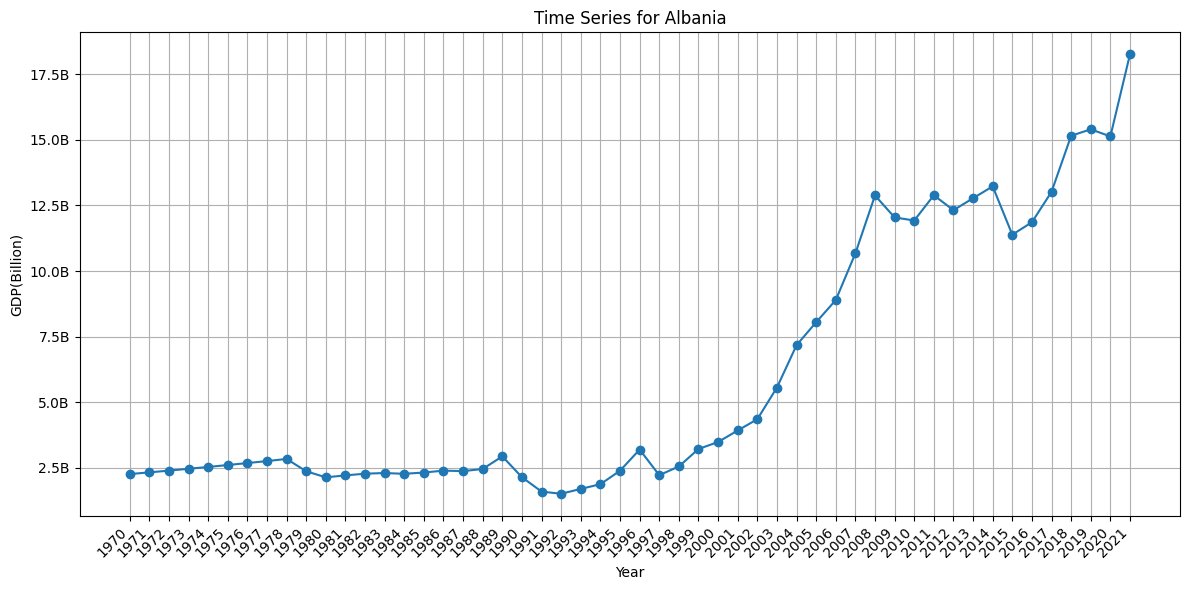

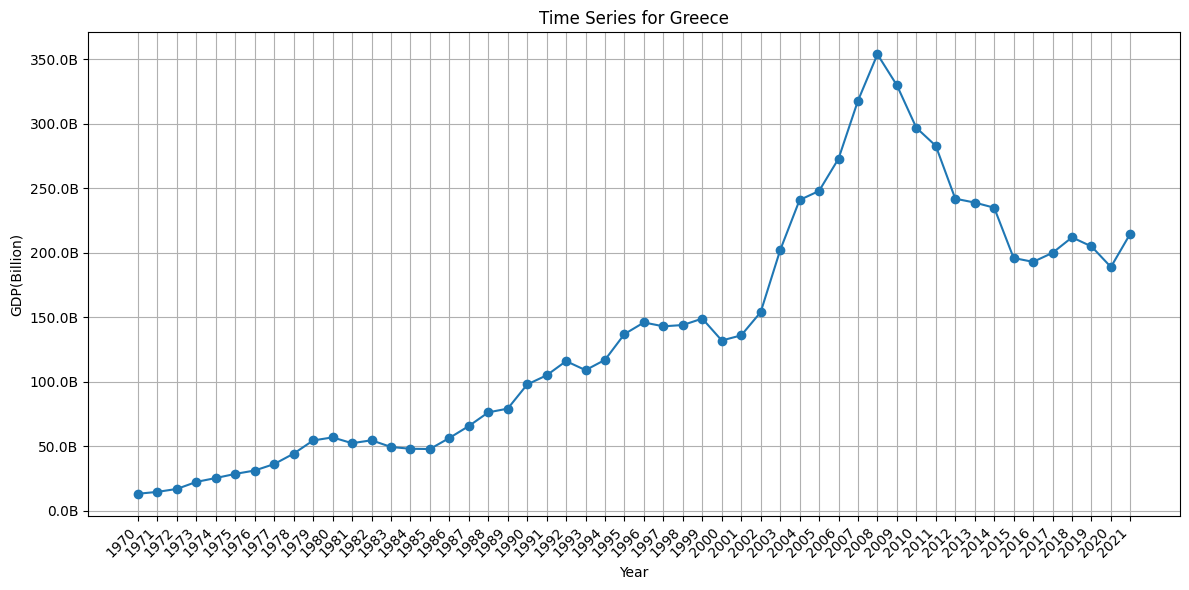

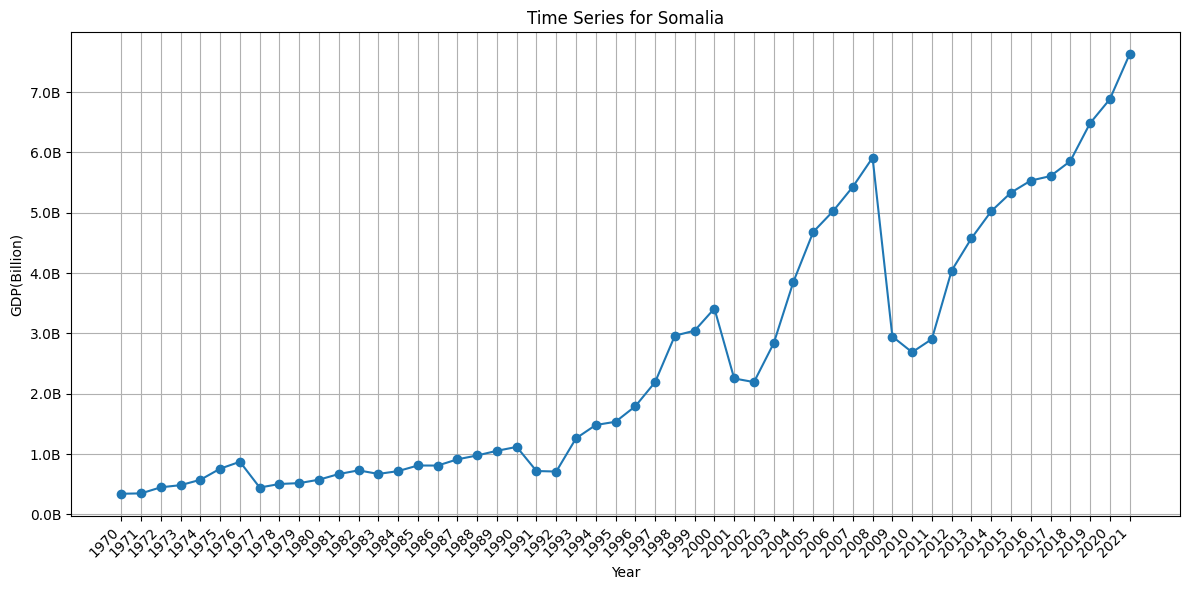

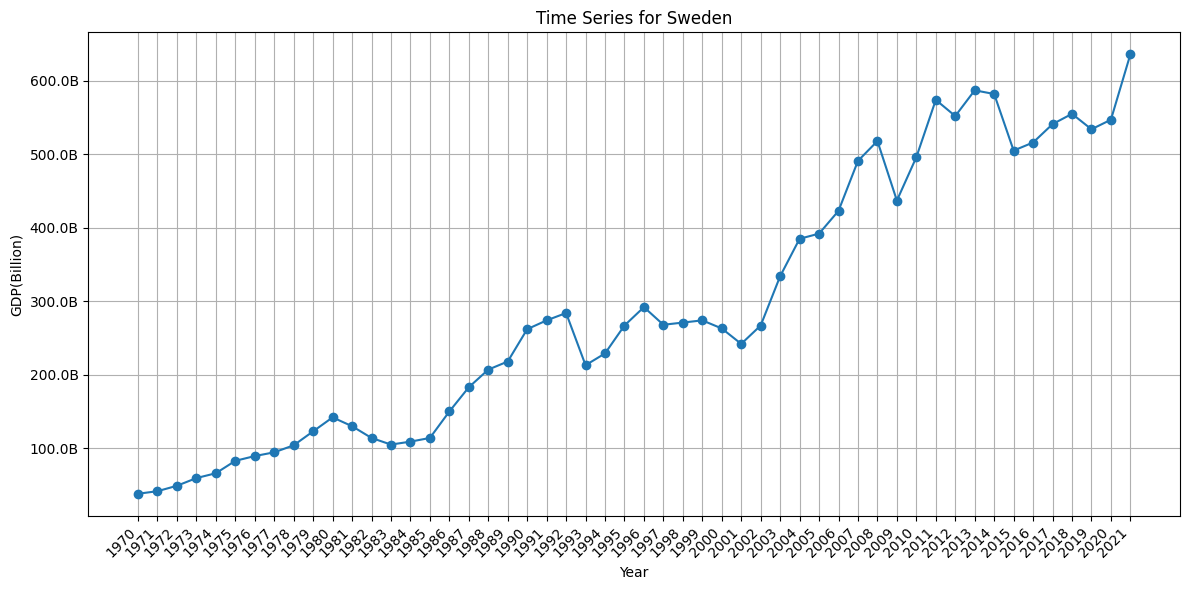

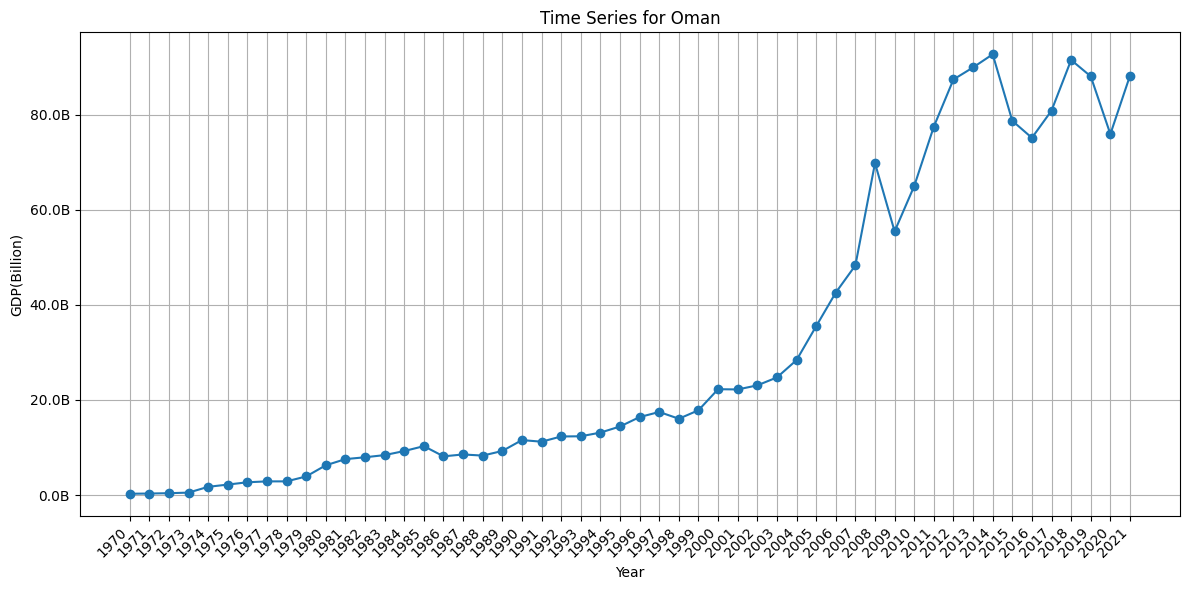

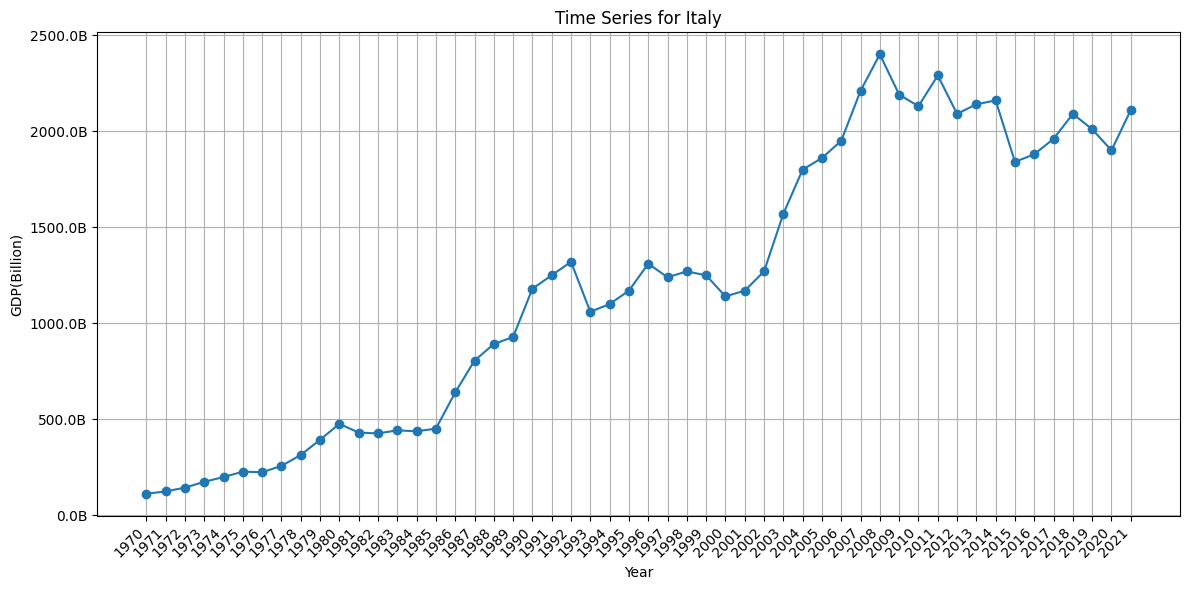

In [7]:
# Get the list of countries
selected_countries = ['Albania', 'Greece', 'Somalia', 'Sweden', 'Oman', 'Italy']

# Plot the Non-StandardScaler 
print("Original Data Time Series:")
plot_time_series(data_raw, selected_countries, scaler=False)

In [8]:
# Standardize the data
scaler = StandardScaler()

# Create an empty list to store the scaled data
scaled_data = []

# Loop through the data by year
for year, year_data in data_raw.groupby('Year'):
    
    country_data = year_data.iloc[:, 2:]

    scaled_values = scaler.fit_transform(country_data.T).T

    scaled_year_data = year_data.copy()
    
    scaled_year_data.iloc[:, 2:] = scaled_values

    scaled_data.append(scaled_year_data)

# Concatenate all the scaled data
data_scaled = pd.concat(scaled_data).reset_index(drop=True)

StandardScaler Data Time Series:


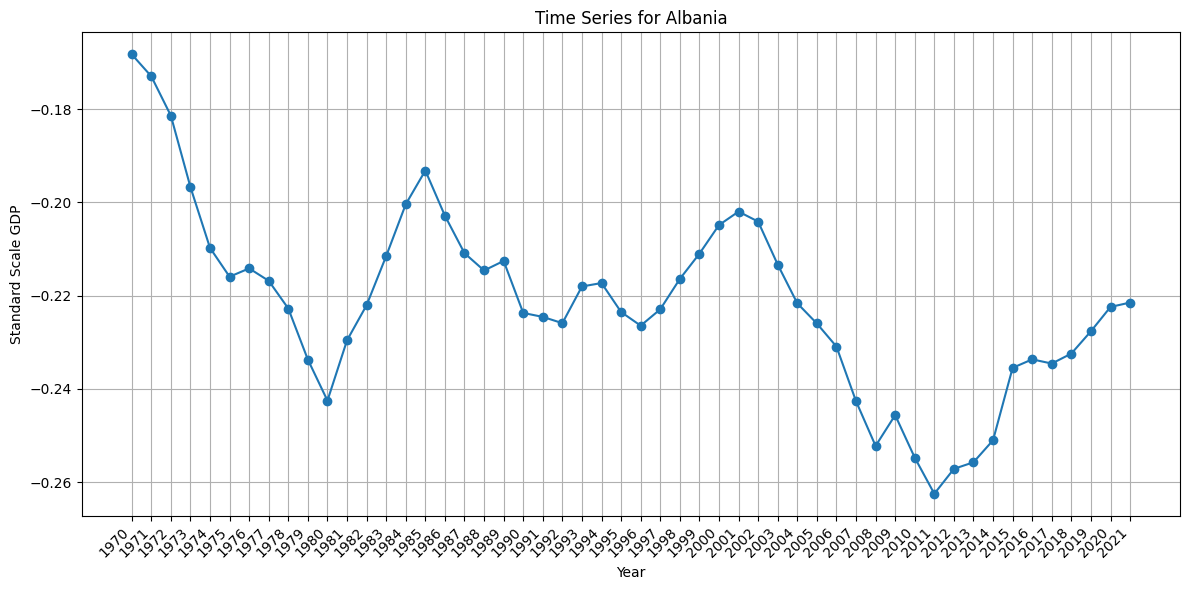

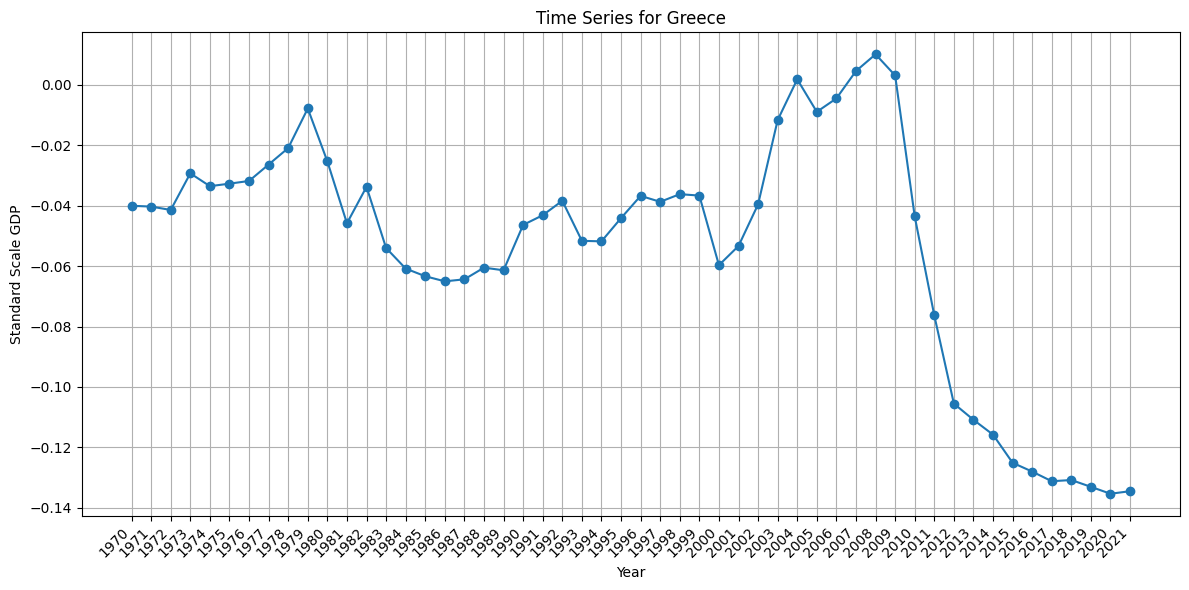

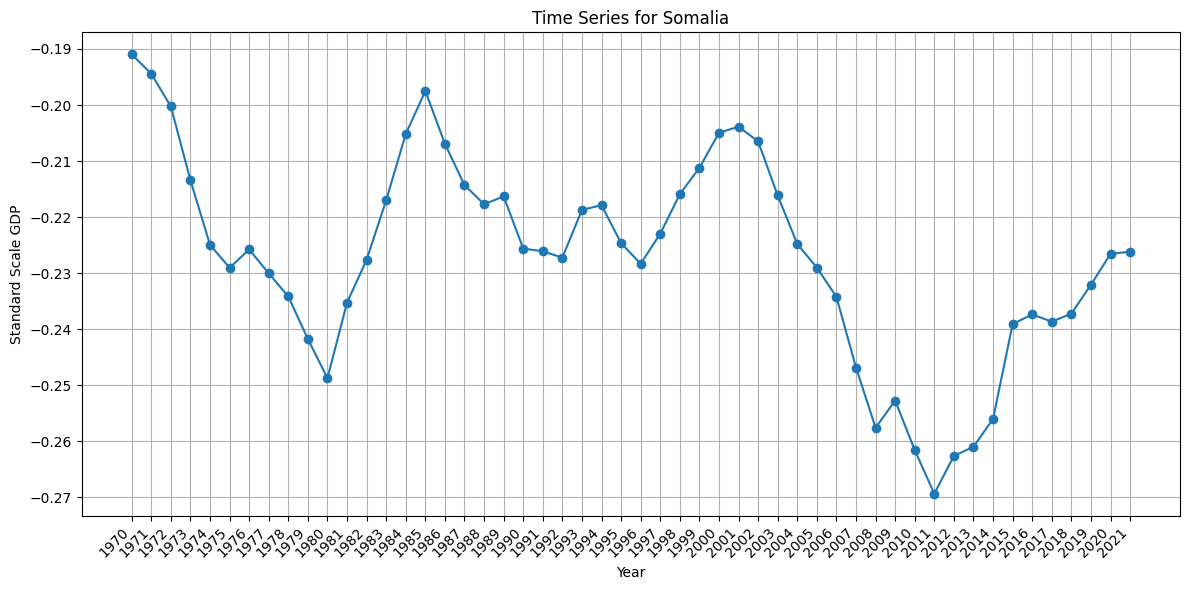

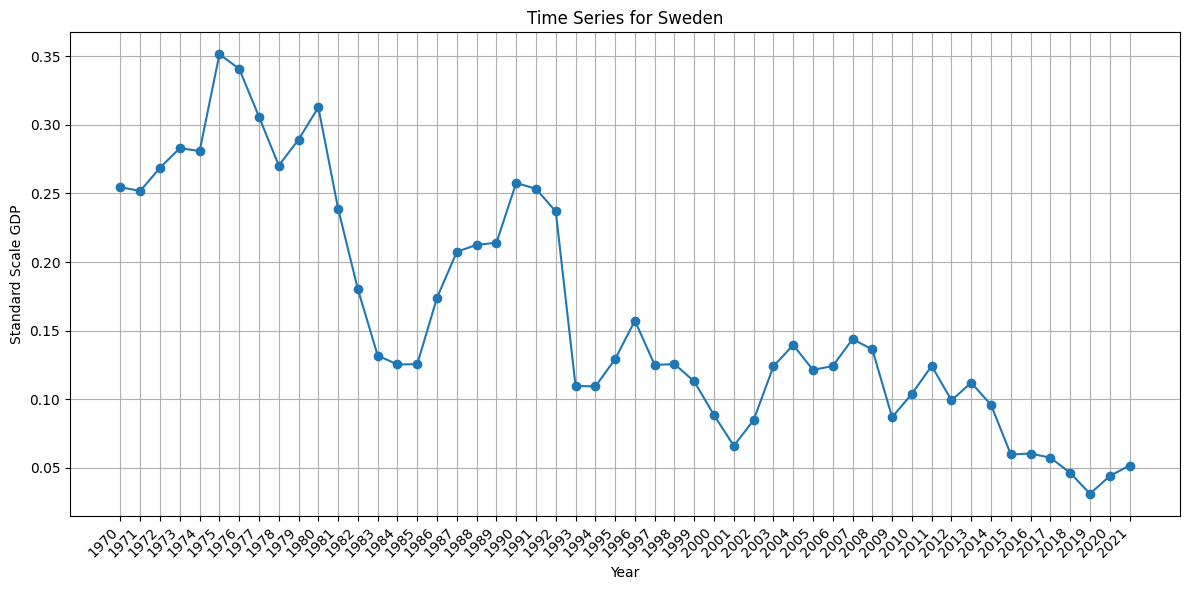

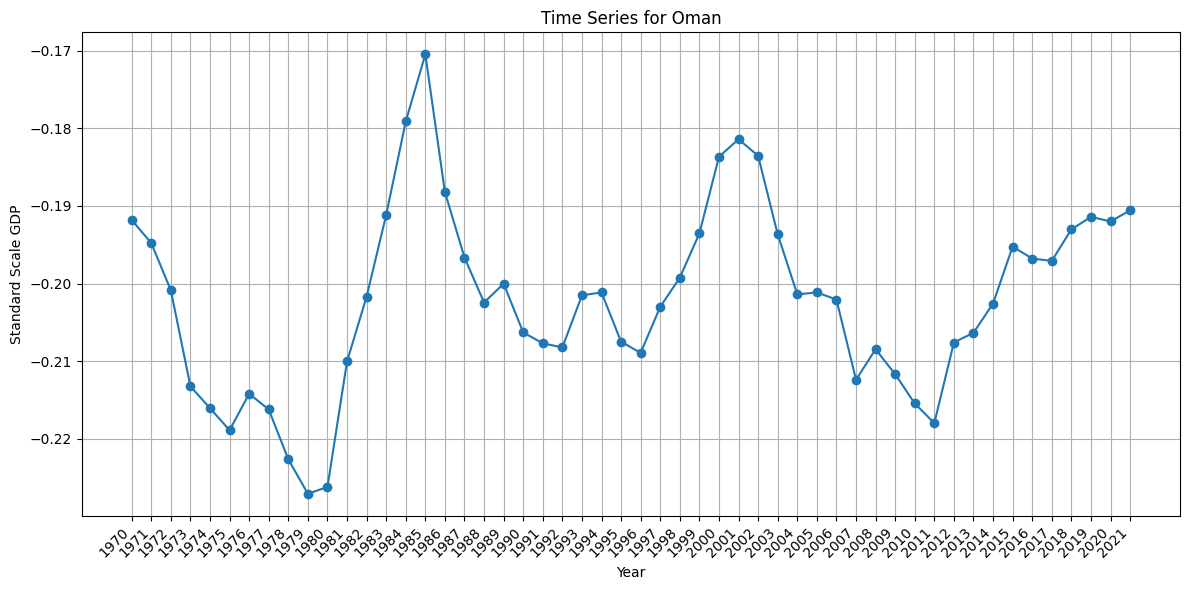

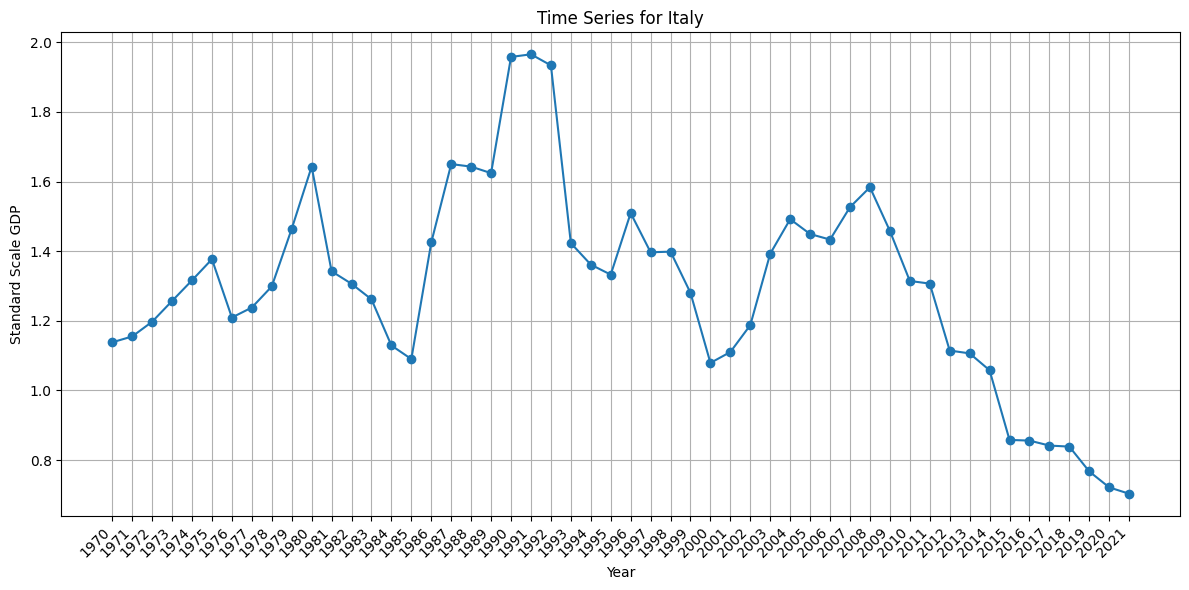

In [9]:
# Plot the StandardScaler
print("StandardScaler Data Time Series:")
plot_time_series(data_scaled, selected_countries, scaler=True)

In [10]:
# Reset the dataset
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/domestic_product.csv',
    index_col=0
)

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (52, 52).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99.9% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]** <p>
The first few PCA(1&2)  appear to have smoother, more discernible trends.

In [11]:
# Standardize the data
data_scaled_array = scaler.fit_transform(data_raw)
data_scaled = pd.DataFrame(data_scaled_array, columns=data_raw.columns, index=data_raw.index)

In [12]:
# Compute the covariance matrix
n, m = data_scaled.shape
# Compute covariance matrix
C = np.cov(data_scaled.T)
# Print the shape of the covariance matrix
print(C.shape)

(52, 52)


In [13]:
# Write a function that gets the covariance matrix of dataframe returns sorted eigenvalues and eigenvectors
def get_sorted_eigen(df_cov):
    # Get the eigenvalues and eigenvectors
    eigenValues, eigenVectors = np.linalg.eigh(df_cov)
    # Sort the eigenvalues in descending order
    args = (-eigenValues).argsort()
    # Get the sorted eigenvalues and eigenvectors
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]
    return eigenValues, eigenVectors

In [14]:
eigenValues, eigenVectors = get_sorted_eigen(C)

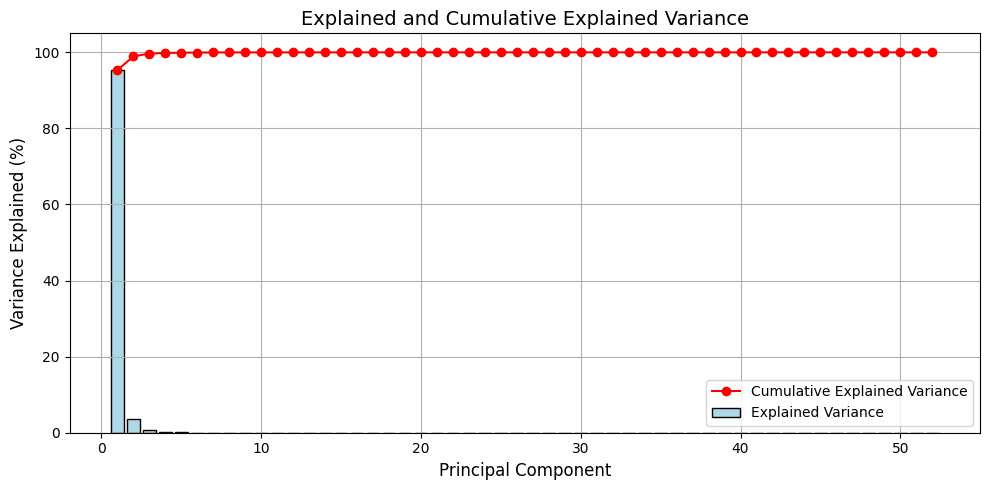

In [15]:
# Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`
eigValSum = sum(eigenValues)
expVar = [(eigV / eigValSum) * 100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

# Plot the scree plot
plt.figure(figsize=(10, 5)) 
plt.bar(range(1, 53), expVar, color='lightblue', edgecolor='black', label='Explained Variance')
plt.plot(range(1, 53), cumExpVar, color='red', marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained (%)', fontsize=12)
plt.title('Explained and Cumulative Explained Variance', fontsize=14)
plt.grid() 
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
# Find the number of principal components that can cover 99.9% of the dataset's variance
num_components = next(i + 1 for i, var in enumerate(cumExpVar) if var >= 99.9)

# Print the result
print(f'{num_components} Principal Components can cover {cumExpVar[num_components - 1]:.2f}% of the dataset\'s variance')

5 Principal Components can cover 99.91% of the dataset's variance


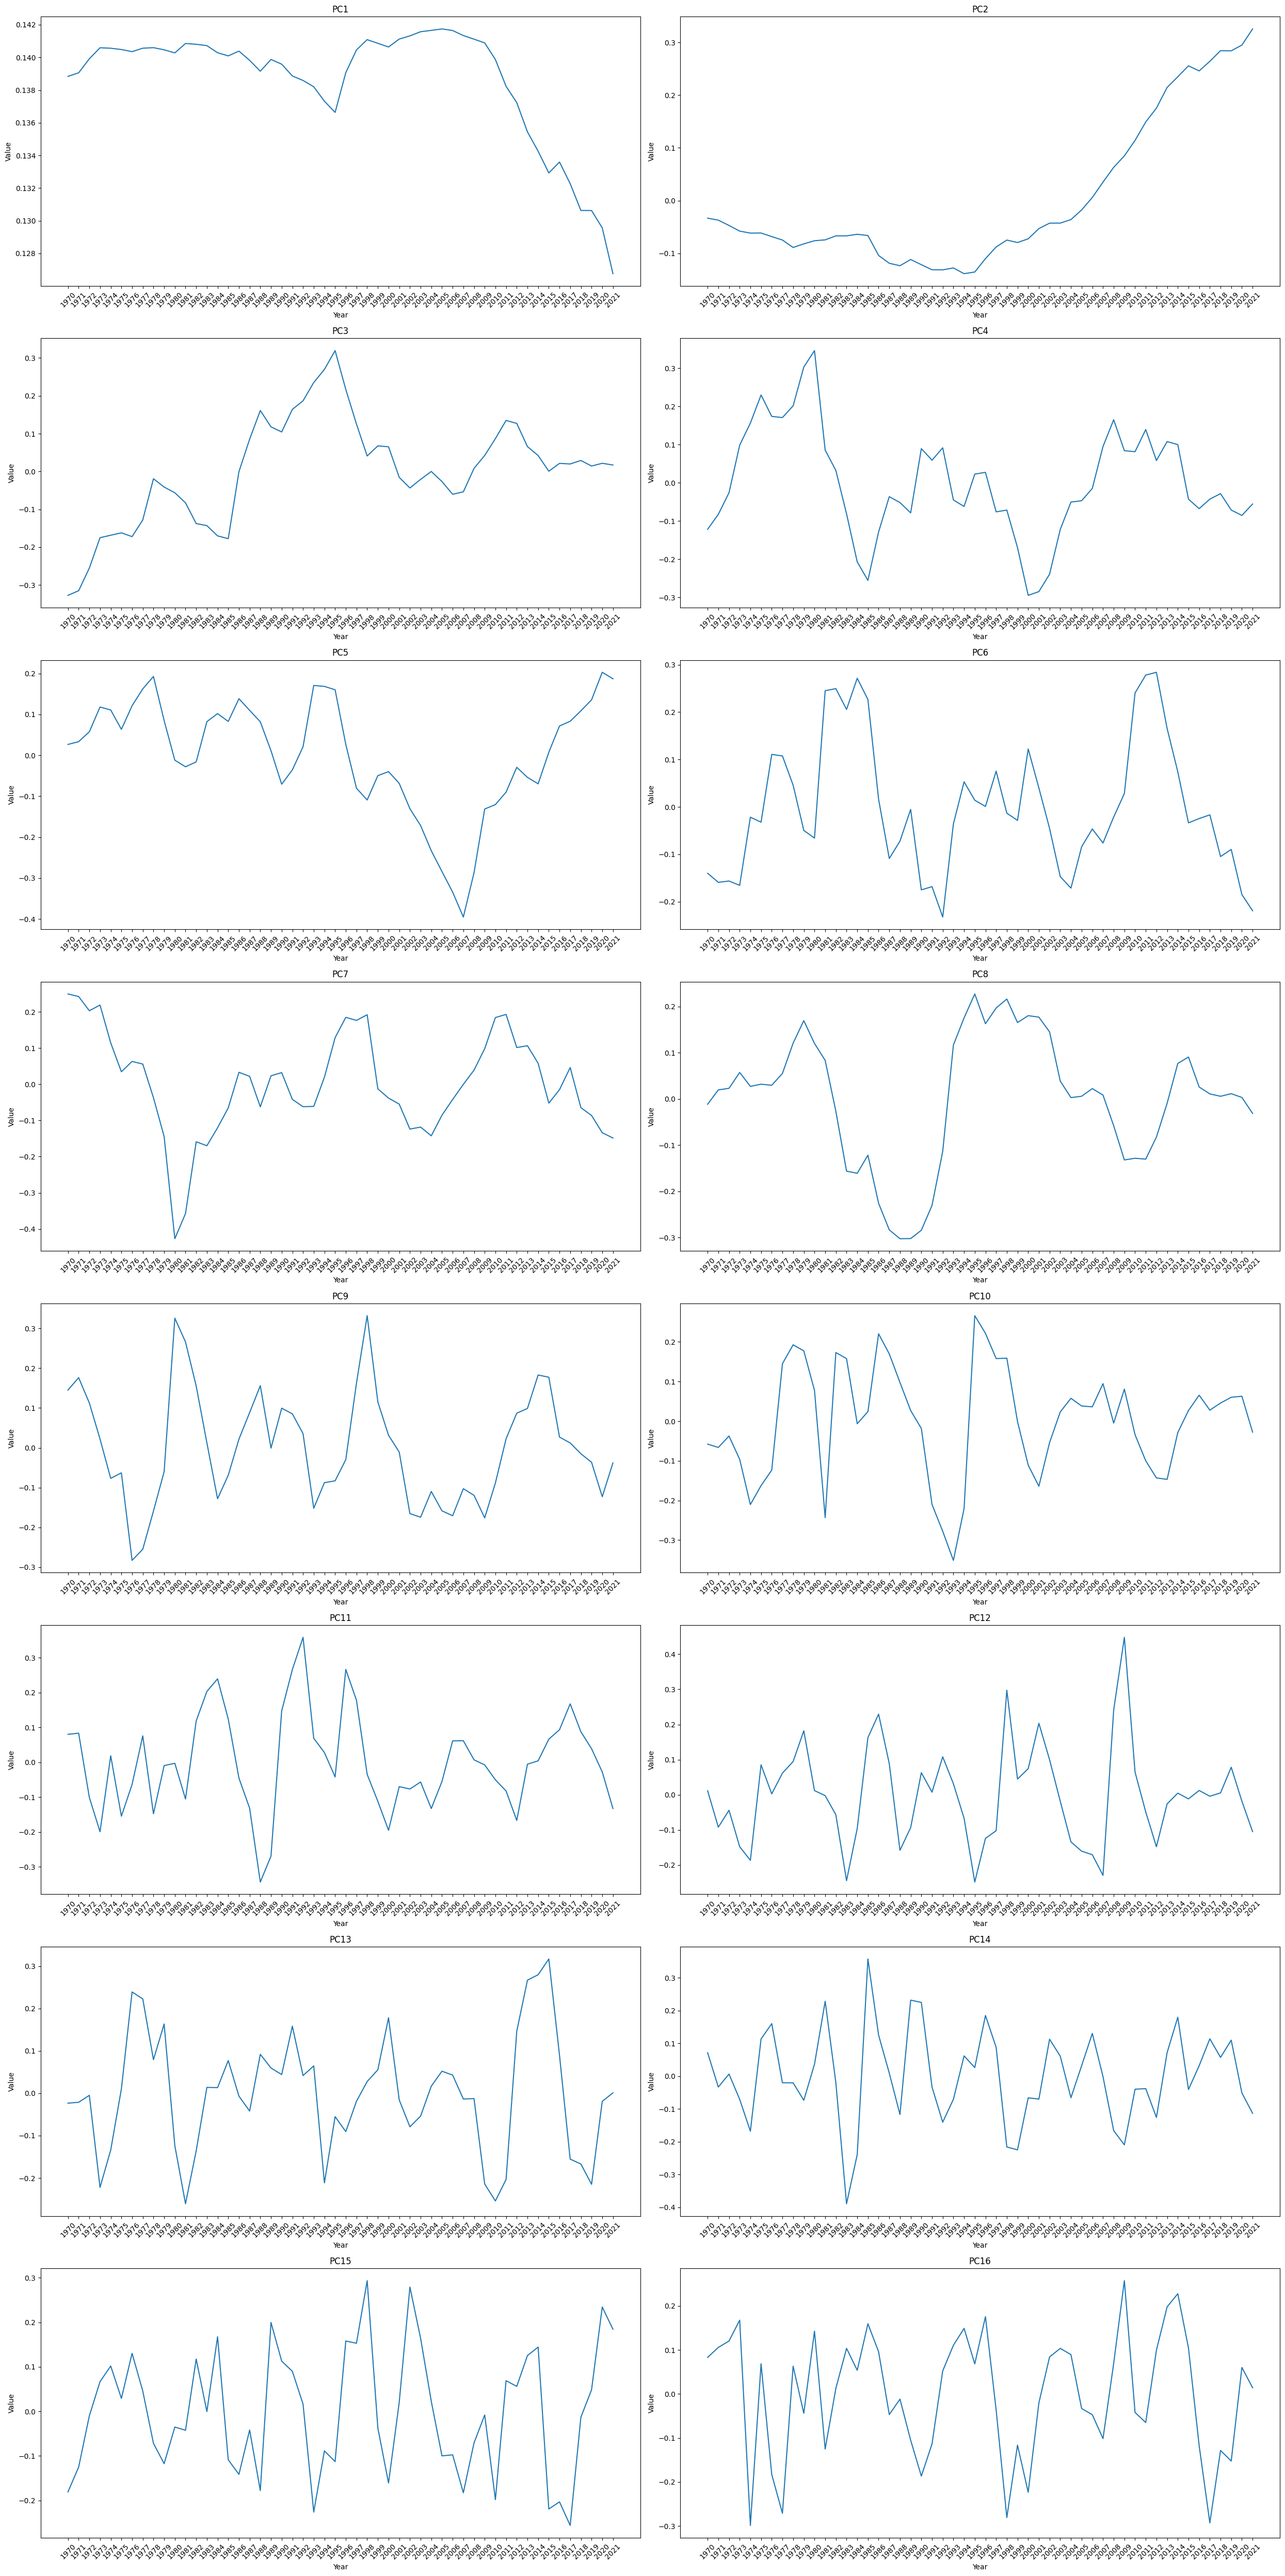

In [17]:
# Plot the first 16 principal components (Eigenvectors) as a time series
# Crete a array of years from 1970 to 2022
years = np.arange(1970, 2022)

# Plot the first 16 principal components
plt.figure(figsize=(25, 50))
for i in range(16):
    plt.subplot(8, 2, i+1)
    plt.plot(years, eigenVectors[:, i]) 
    plt.xticks(np.arange(1970, 2022), rotation=45) 
    plt.title('PC' + str(i+1))
    plt.xlabel('Year')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Part 3: Data reconstruction [4.5 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues.
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable):
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[1]**
      * Hint: You are plotting the error that we have for reconstructing each year `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the three countries you selected in `Part 1.3` plus ` Greece `,` Somalia `, and ` Italy ` as inputs. **[0.5]**


In [18]:
# Combined function to plot all required figures
def plot_country_figures(original_df, country_name):
    # Standardize the entire dataset
    scaler = StandardScaler()
    original_scaled = scaler.fit_transform(original_df.values)
    
    # Compute the covariance matrix and eigenvectors
    C = np.cov(original_scaled.T)
    eigenValues, eigenVectors = get_sorted_eigen(C)
    
    # Step 3.3: Extract the data for the specific country
    country_data = original_df.loc[country_name].values.reshape(1, -1)
    country_data_standard = scaler.transform(country_data)
    
    # Step 3.4: Plotting the required figures
    plt.figure(figsize=(18, 12))
    
    # 1. Original Time-Series for the country
    plt.subplot(2, 2, 1)
    original_df.loc[country_name, :].plot(title="Original Time-Series for " + country_name)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.xticks(np.arange(0, len(original_df.columns), 5), rotation=45)
    plt.grid()
    
    # 2. Incremental Reconstruction of the non-standardized time-series
    plt.subplot(2, 2, 2)
    num_components_list = [1, 2, 4, 8, 16]
    for num_components in num_components_list:
        W = eigenVectors[:, :num_components]
        country_projected = np.dot(country_data_standard, W)
        reconstructed_data_standard = np.dot(country_projected, W.T)
        reconstructed_data_original = scaler.inverse_transform(reconstructed_data_standard)
        plt.plot(original_df.columns, reconstructed_data_original.flatten(), label=f"PC{num_components}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title("Incremental Reconstruction of the non-standardized time-series for " + country_name)
    plt.legend()
    plt.xticks(np.arange(0, len(original_df.columns), 5), rotation=45)
    plt.grid()
    
    # 3. Residual Error for the Best Reconstruction (using 16 PCs)
    plt.subplot(2, 2, 3)
    best_num_components = min(16, original_df.shape[1]) 
    W_best = eigenVectors[:, :best_num_components]
    country_projected_best = np.dot(country_data_standard, W_best)
    best_reconstructed_data_standard = np.dot(country_projected_best, W_best.T)
    best_reconstructed_data_original = scaler.inverse_transform(best_reconstructed_data_standard)
    residual_error = country_data.flatten() - best_reconstructed_data_original.flatten()
    plt.plot(original_df.columns, residual_error, label=f"PC{best_num_components} Residual Error")
    plt.xlabel("Year")
    plt.ylabel("Error")
    plt.title("Residual Error for the Best Reconstruction for " + country_name)
    plt.legend()
    plt.xticks(np.arange(0, len(original_df.columns), 5), rotation=45)
    plt.grid()
    
    # 4. RMSE of Reconstruction as a function of the number of components
    plt.subplot(2, 2, 4)
    rmse_list = []
    components_range = range(1, min(11, original_df.shape[1] + 1)) 
    for num_components in components_range:
        W = eigenVectors[:, :num_components]
        country_projected = np.dot(country_data_standard, W)
        reconstructed_data_standard = np.dot(country_projected, W.T)
        reconstructed_data_original = scaler.inverse_transform(reconstructed_data_standard)
        rmse = np.sqrt(mean_squared_error(country_data, reconstructed_data_original))
        rmse_list.append(rmse)
    plt.plot(components_range, rmse_list, marker='o', label='RMSE (PC1-10)')
    plt.xlabel('Number of PCs')
    plt.ylabel('RMSE')
    plt.title("RMSE vs Number of Principal Components for " + country_name)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


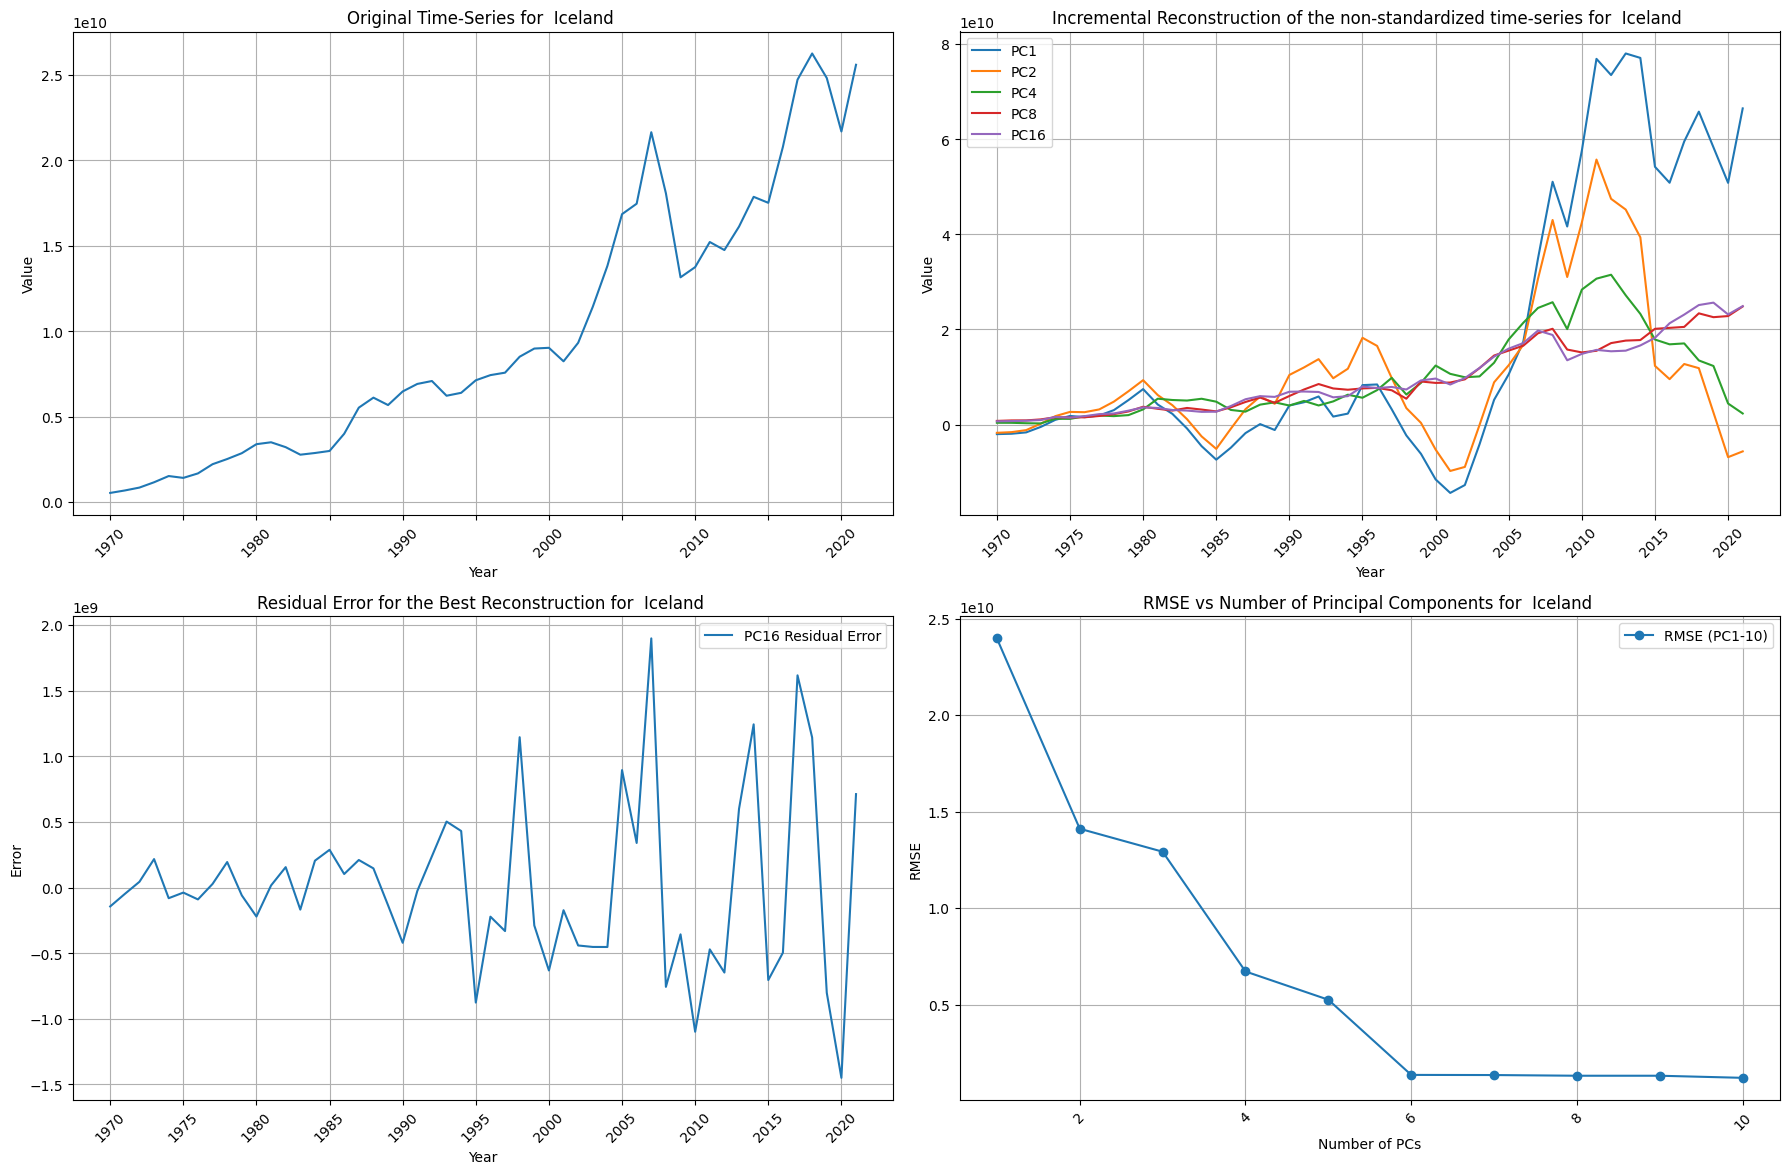

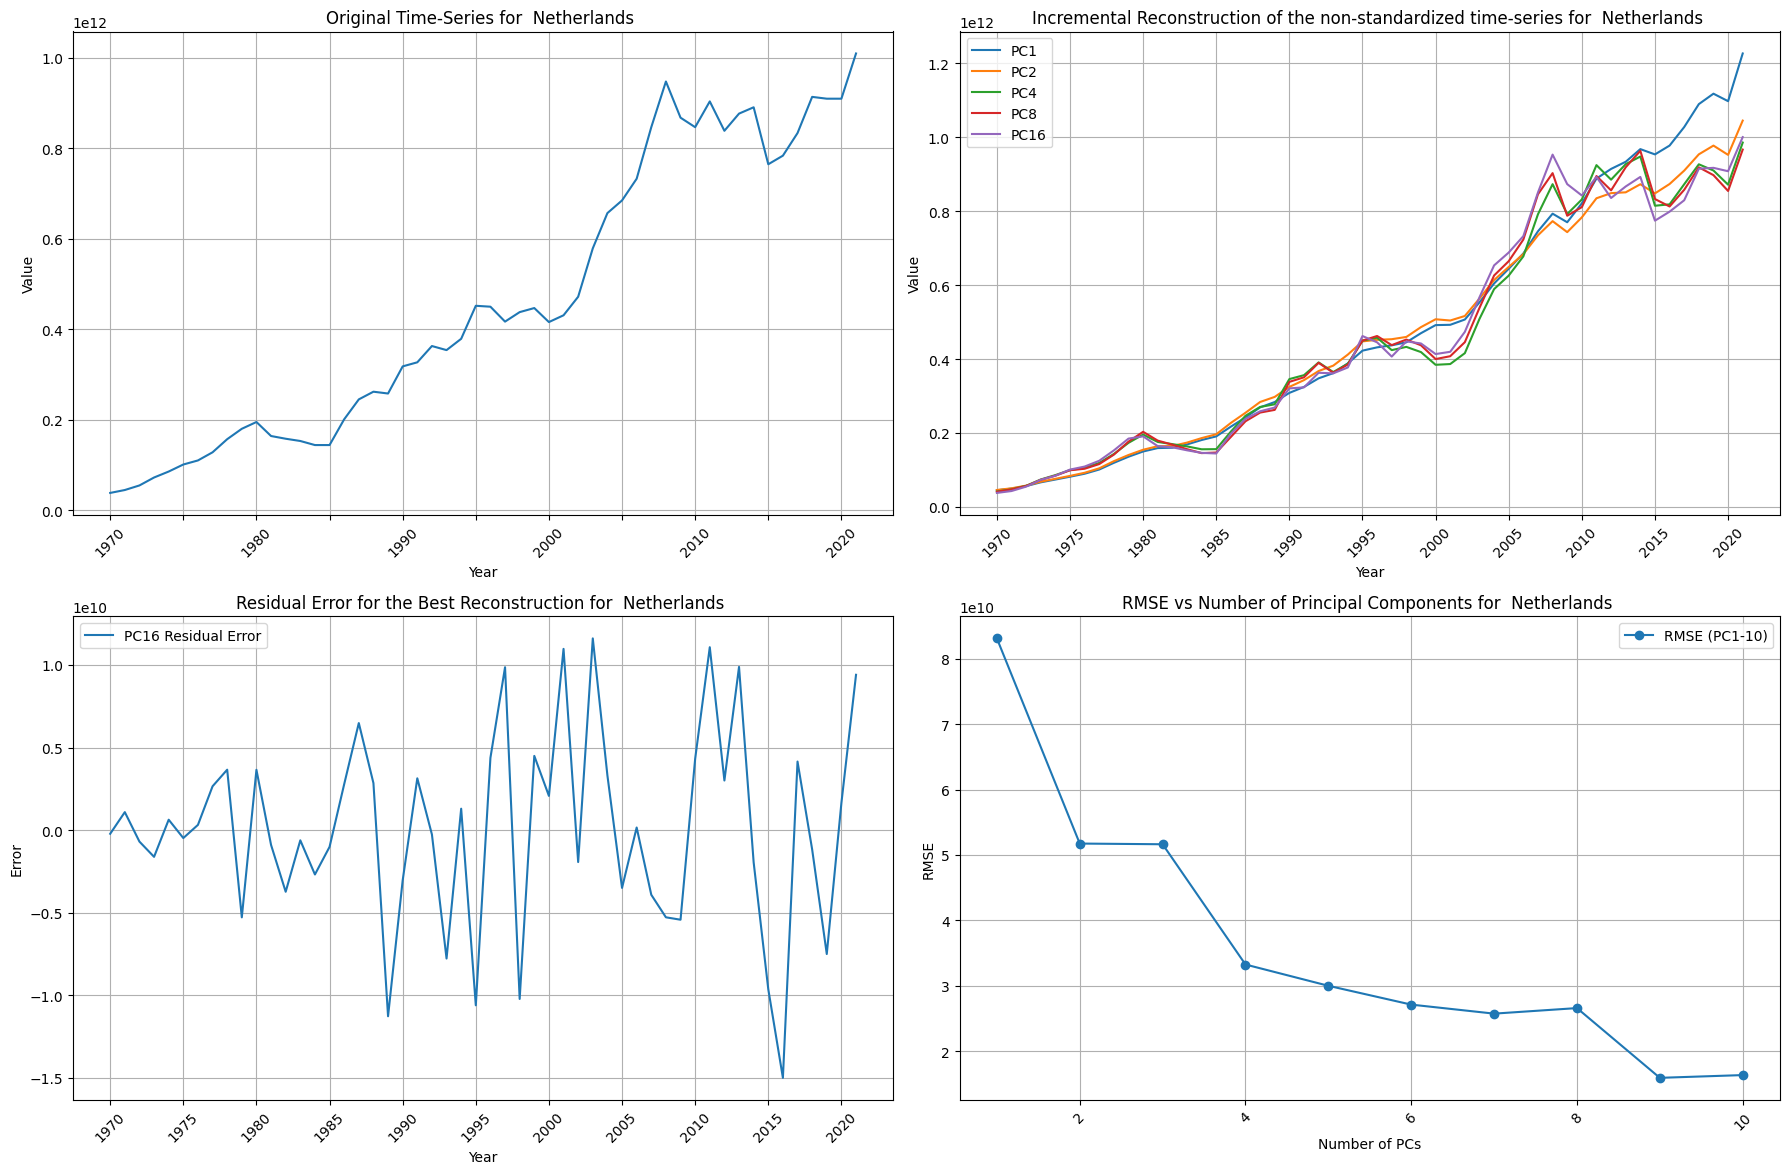

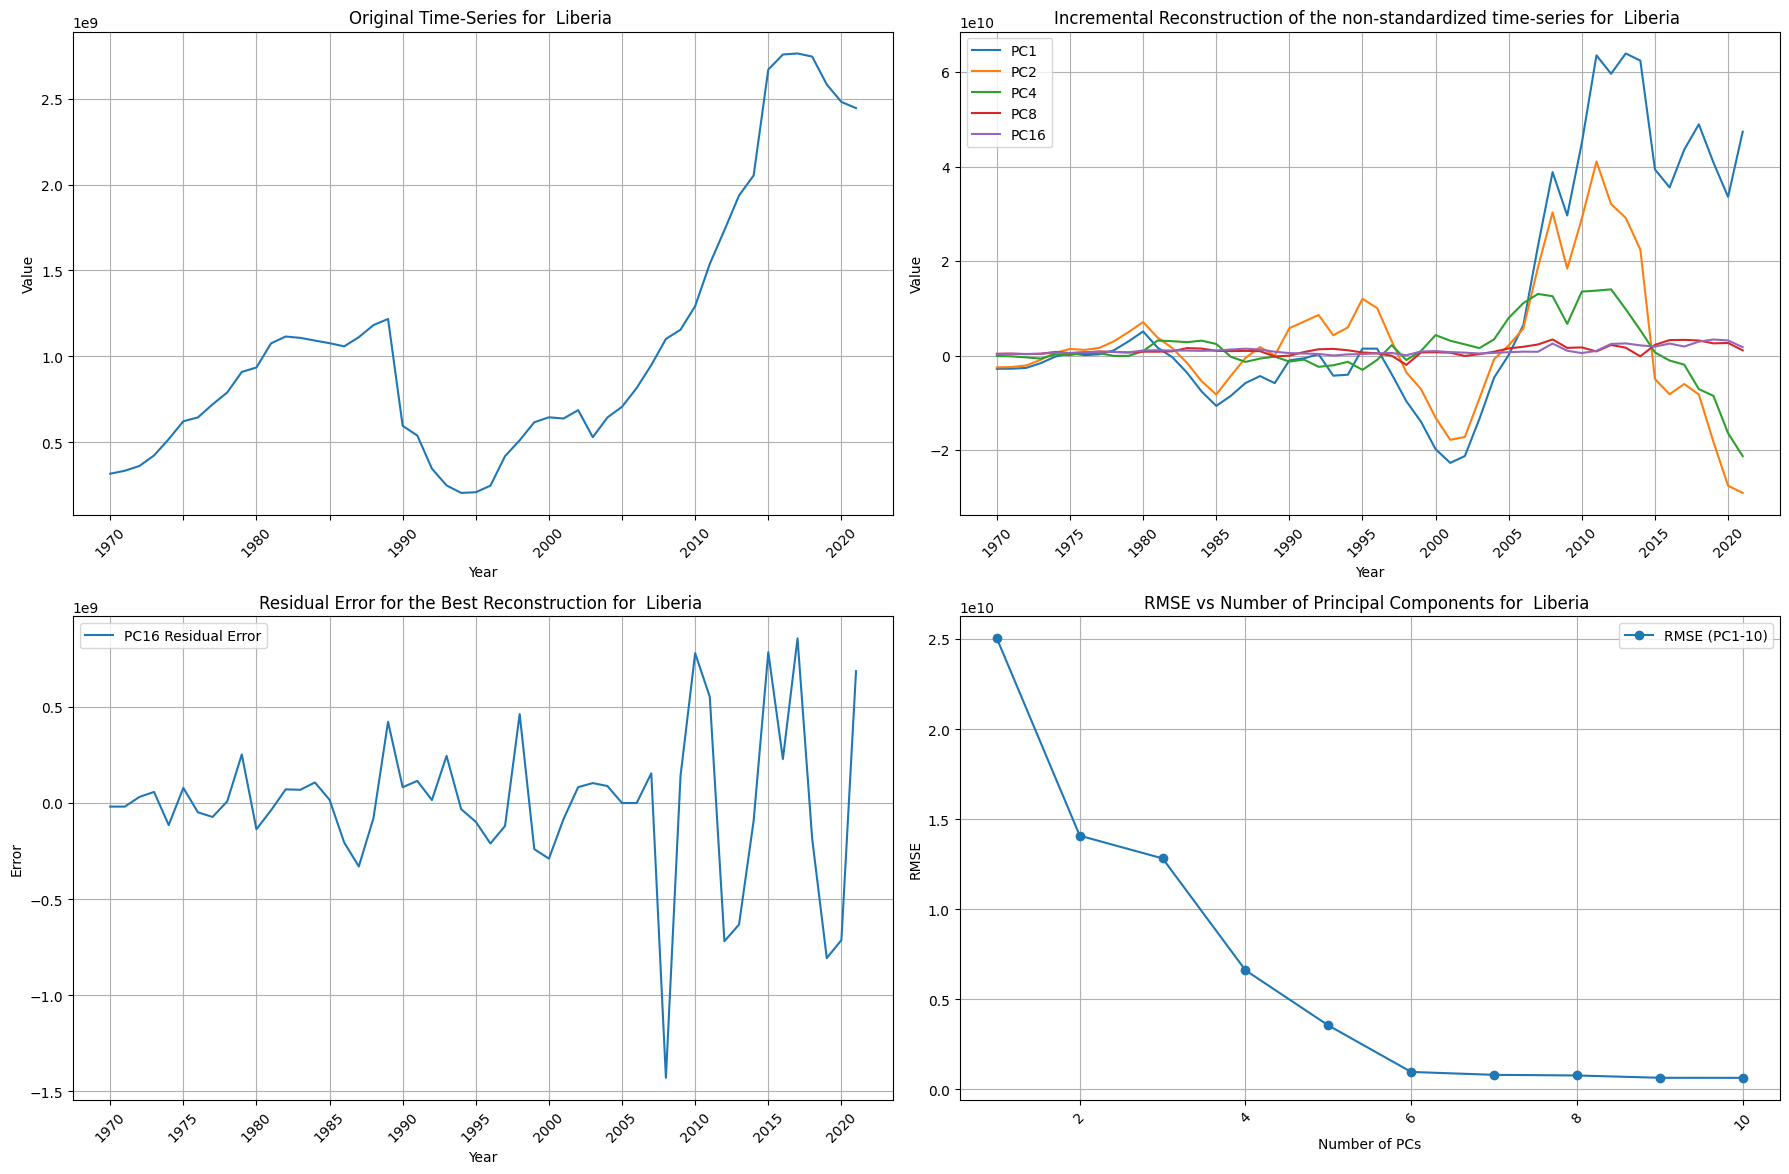

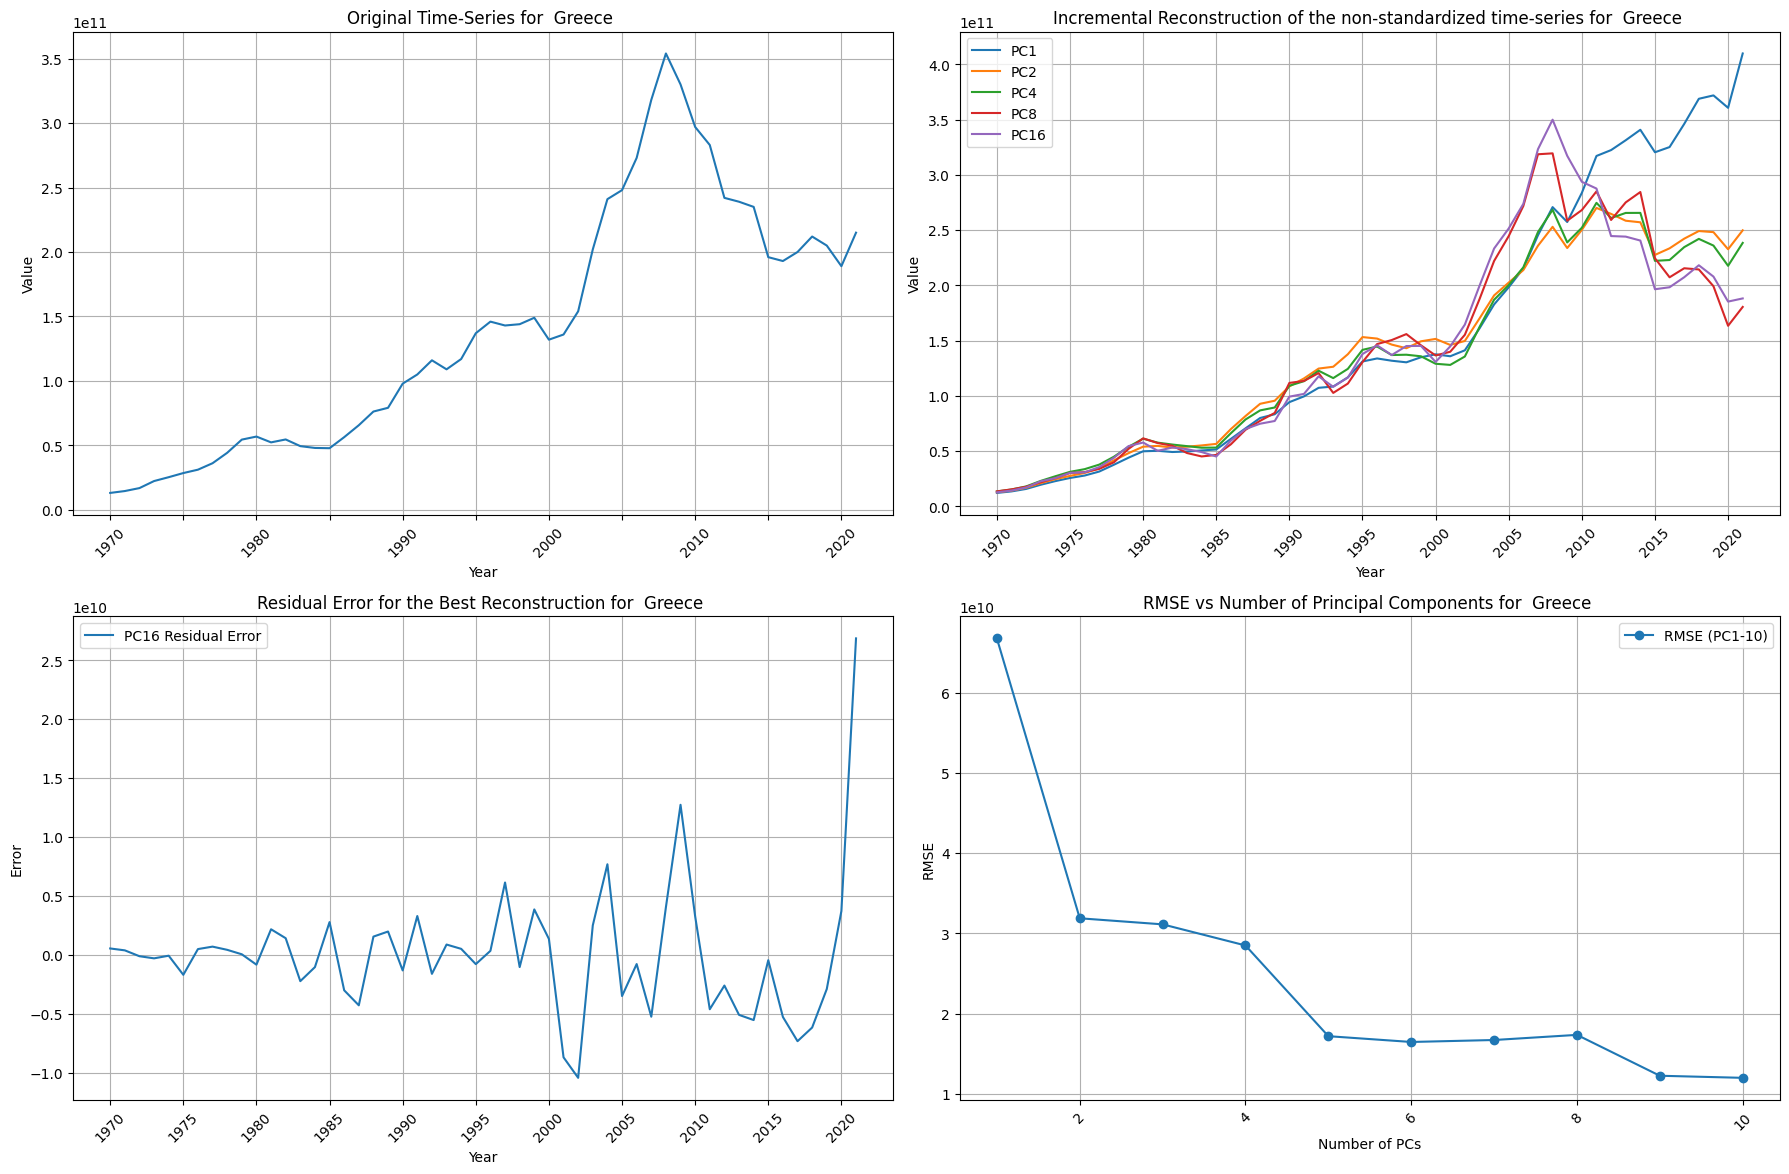

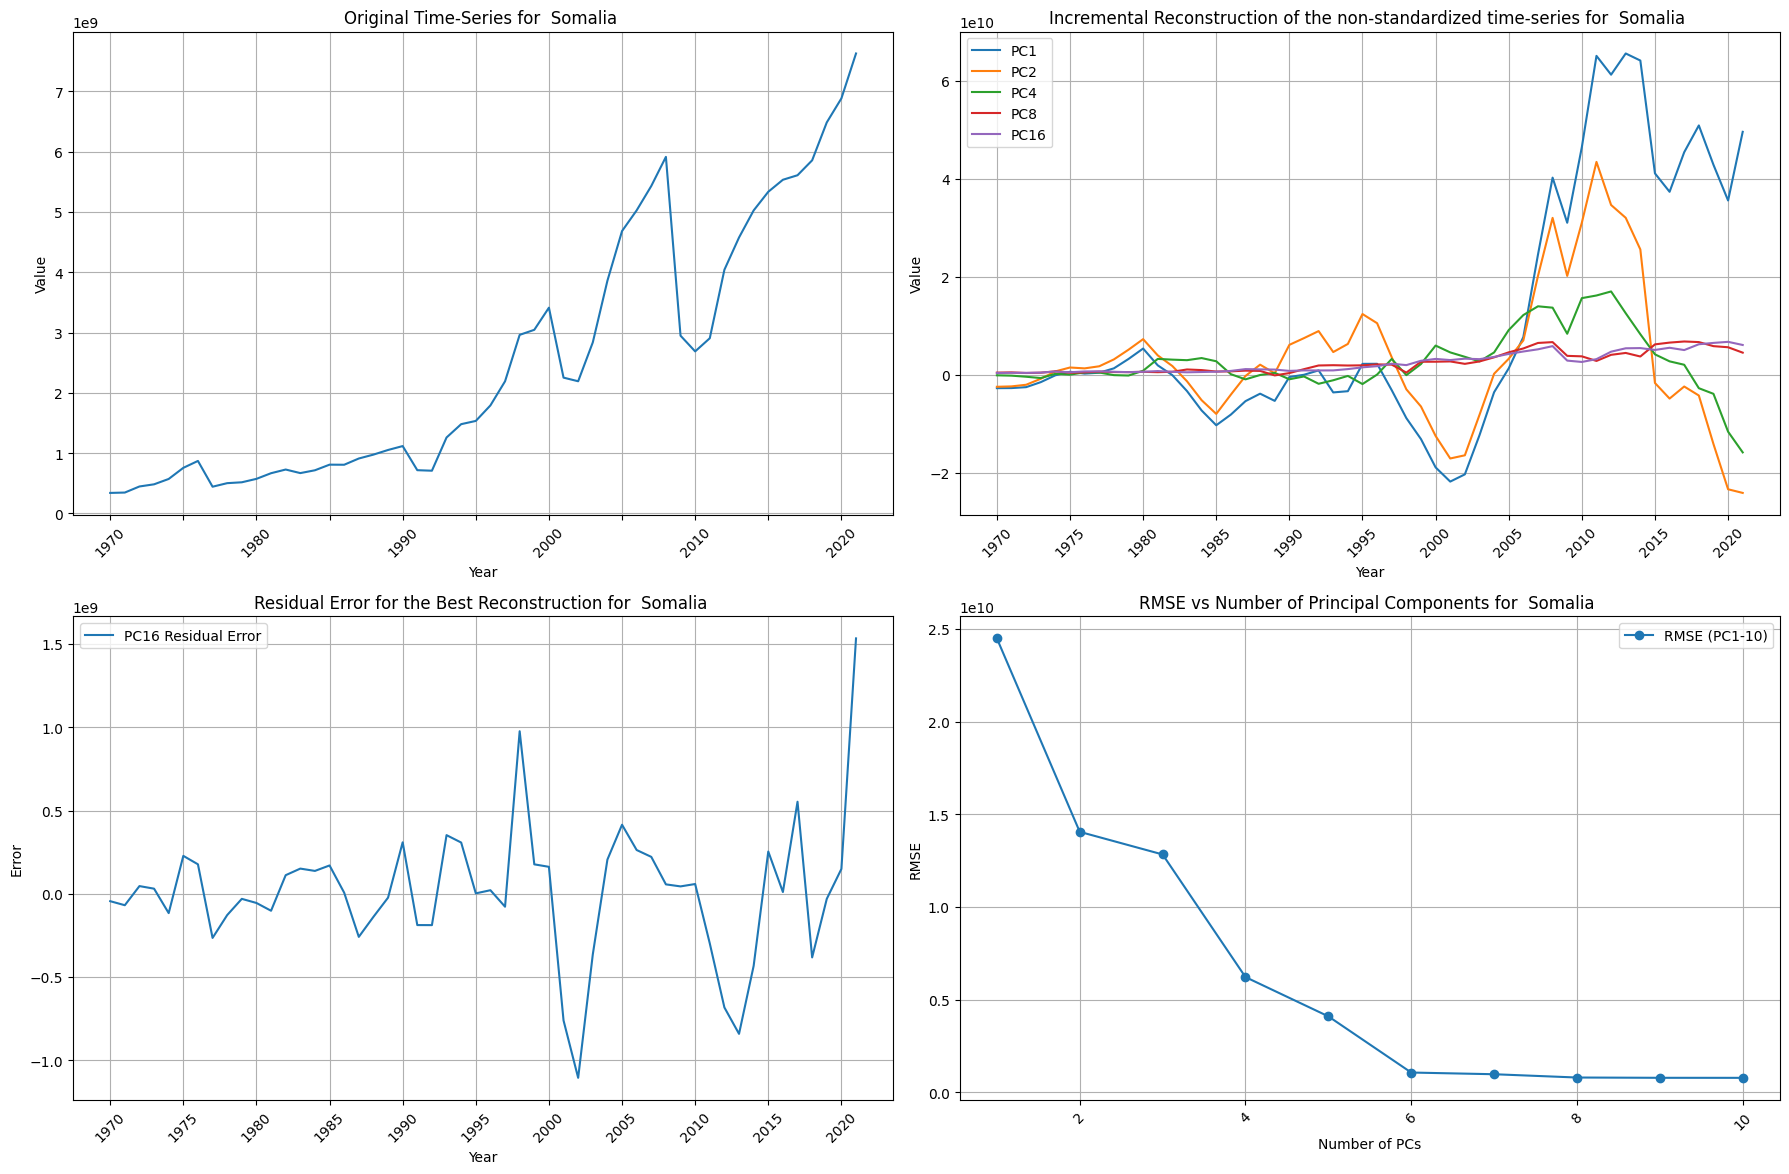

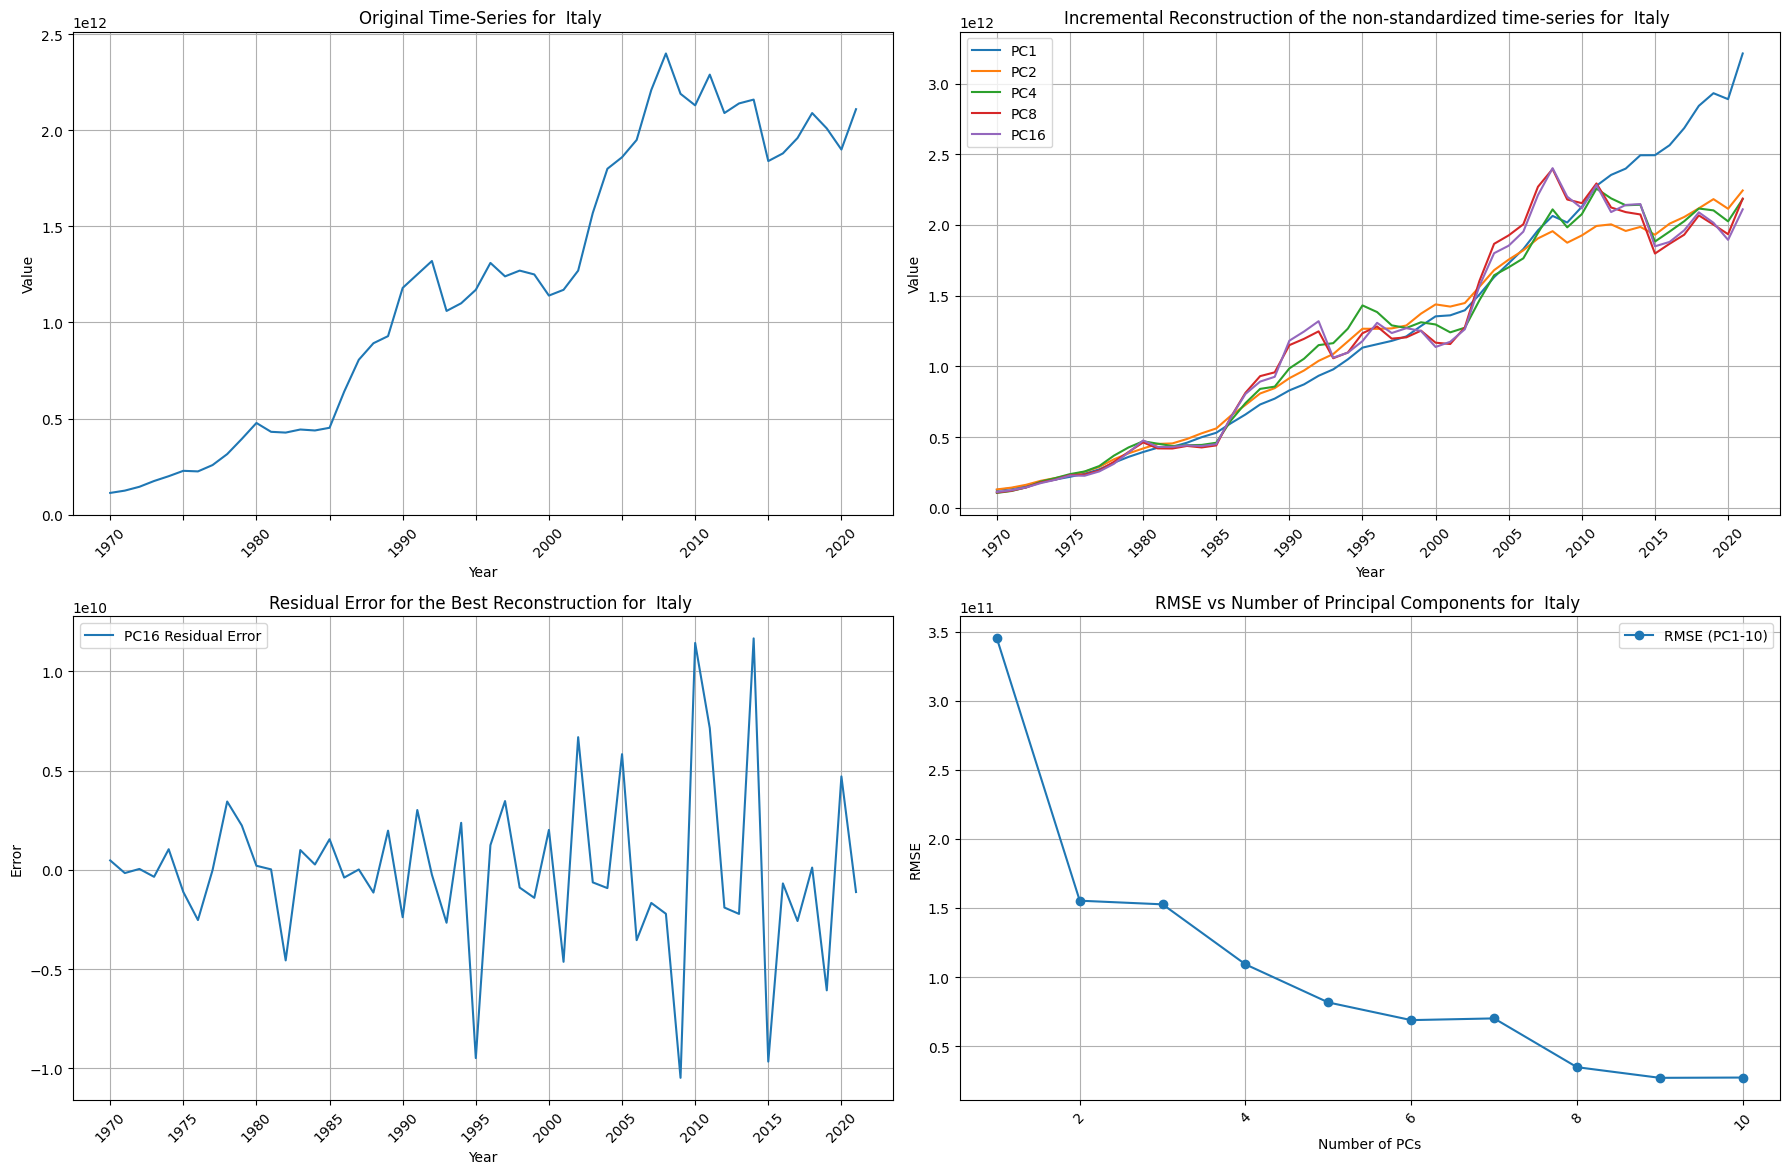

In [19]:
country_list = [' Iceland ', ' Netherlands ', ' Liberia ', ' Greece ', ' Somalia ', ' Italy ']
for country in country_list:
    plot_country_figures(data_raw, country)

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison **[0.5]**, and comment on the results. **[0.5]**. <p>
Standardization is not mandatory required for performing SVD from a mathematical standpoint. However, as covariance is not computed during the process. Without standardization, the singular values corresponding to different features may differ significantly in magnitude. This can make SVD overly sensitive to features with large singular values, potentially leading to suboptimal dimensionality reduction. Standardizing the data ensures that all features are given equal importance, thereby improving the effectiveness of SVD.

The identical RMSE for PCA and SVD in the plot arises from their mathematical equivalence in dimensionality reduction. Both methods use the same principal directions to reconstruct the data, leading to identical reconstruction errors. In PCA, we decompose the covariance matrix C=A^TA to find eigenvectors (principal components) and eigenvalues, which capture the directions and variances in the data. In SVD, we decompose the original data matrix A directly into  UΣV^T, where the right singular vectors V align with the eigenvectors of C, and the squared singular values correspond to the eigenvalues. Thus, whether we use PCA’s eigen decomposition or SVD, the projections and reconstructions are the same, yielding identical RMSE values. 

In [20]:
# Combined function to plot all required figures
def plot_country_figures_svd(original_df, country_name):
    # Standardize only the numeric columns
    numeric_df = original_df.select_dtypes(include=['float64', 'int64'])
    
    # Standardize the entire dataset
    scaler = StandardScaler()
    original_scaled = scaler.fit_transform(numeric_df.values)
    
    # Compute the leff singular vectors, singular values, and right singular vectors
    U, S, V = np.linalg.svd(original_scaled, full_matrices=False)
    
    # Step 3.3: Extract the data for the specific country
    country_data = original_df.loc[country_name].values.reshape(1, -1)
    country_data_standard = scaler.transform(country_data)
    
    # Step 3.4: Plotting the required figures
    plt.figure(figsize=(18, 12))
    
    # 1. Original Time-Series for the country
    plt.subplot(2, 2, 1)
    original_df.loc[country_name, :].plot(title="Original Time-Series for " + country_name)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.xticks(np.arange(0, len(original_df.columns), 5), rotation=45)
    plt.grid()
    
    # 2. Incremental Reconstruction
    plt.subplot(2, 2, 2)
    num_components_list = [1, 2, 4, 8, 16]
    for num_components in num_components_list:
        v = V[:num_components, :]
        country_projected = np.dot(country_data_standard, v.T)
        reconstructed_data_standard = np.dot(country_projected, v)
        reconstructed_data_original = scaler.inverse_transform(reconstructed_data_standard)
        plt.plot(original_df.columns, reconstructed_data_original.flatten(), label=f"SVD{num_components}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title("Incremental Reconstruction" + country_name)
    plt.legend()
    plt.xticks(np.arange(0, len(original_df.columns), 5), rotation=45)
    plt.grid()
    
    # 3. Residual Error for the Best Reconstruction (using 16 svds)
    plt.subplot(2, 2, 3)
    best_num_components = min(16, original_df.shape[1]) 
    v_best = V[:best_num_components, :]
    country_projected_best = np.dot(country_data_standard, v_best.T)
    best_reconstructed_data_standard = np.dot(country_projected_best, v_best)
    best_reconstructed_data_original = scaler.inverse_transform(best_reconstructed_data_standard)
    residual_error = country_data.flatten() - best_reconstructed_data_original.flatten()
    plt.plot(original_df.columns, residual_error, label=f"SVD{best_num_components} Residual Error")
    plt.xlabel("Year")
    plt.ylabel("Error")
    plt.title("Residual Error for the Best Reconstruction for " + country_name)
    plt.legend()
    plt.xticks(np.arange(0, len(original_df.columns), 5), rotation=45)
    plt.grid()
    
    # 4. RMSE of Reconstruction as a function of the number of components
    plt.subplot(2, 2, 4)
    rmse_list = []
    components_range = range(1, min(11, original_df.shape[1] + 1)) 
    for num_components in components_range:
        v = V[:num_components, :]
        country_projected = np.dot(country_data_standard, v.T)
        reconstructed_data_standard = np.dot(country_projected, v)
        reconstructed_data_original = scaler.inverse_transform(reconstructed_data_standard)
        rmse = np.sqrt(mean_squared_error(country_data, reconstructed_data_original))
        rmse_list.append(rmse)
    plt.plot(components_range, rmse_list, marker='o', label='RMSE (SVD1-10)')
    plt.xlabel('Number of SVDs')
    plt.ylabel('RMSE')
    plt.title("RMSE vs Number of SVDs for " + country_name)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


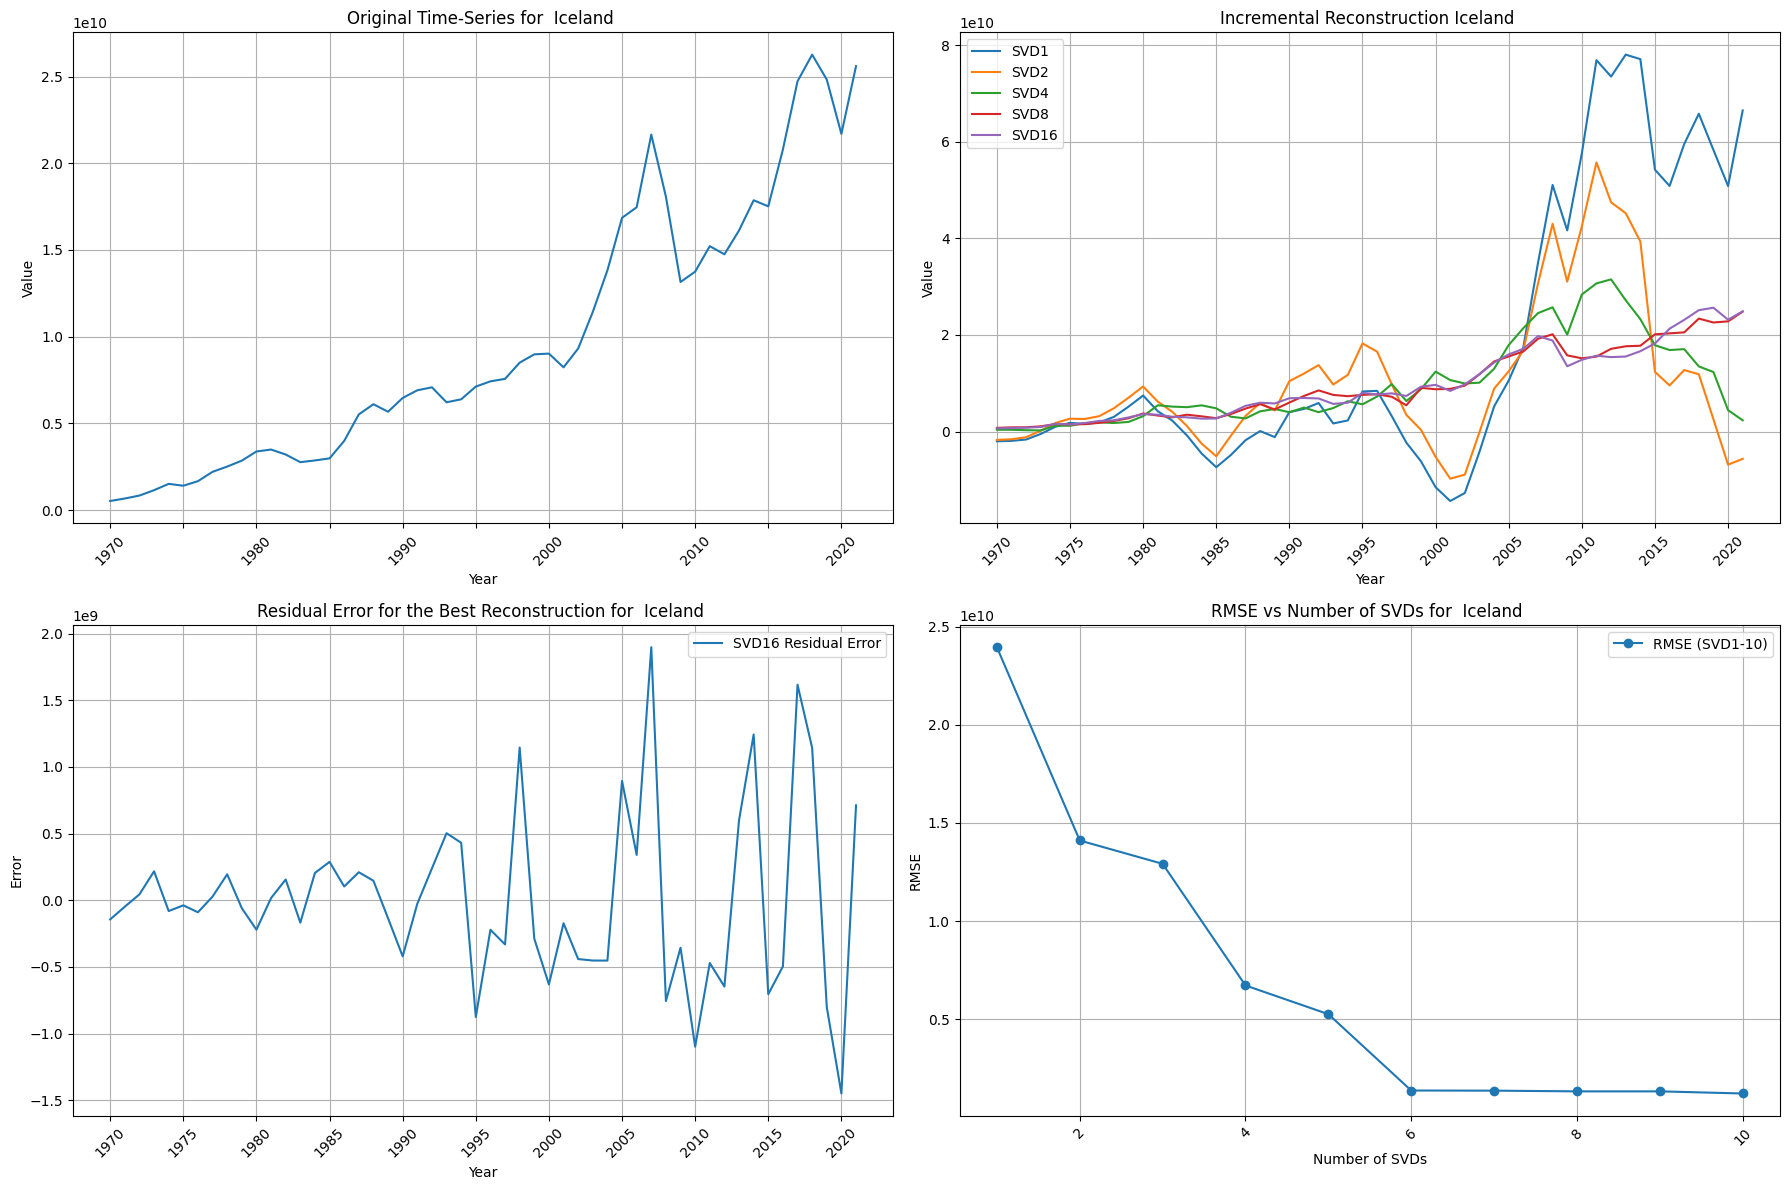

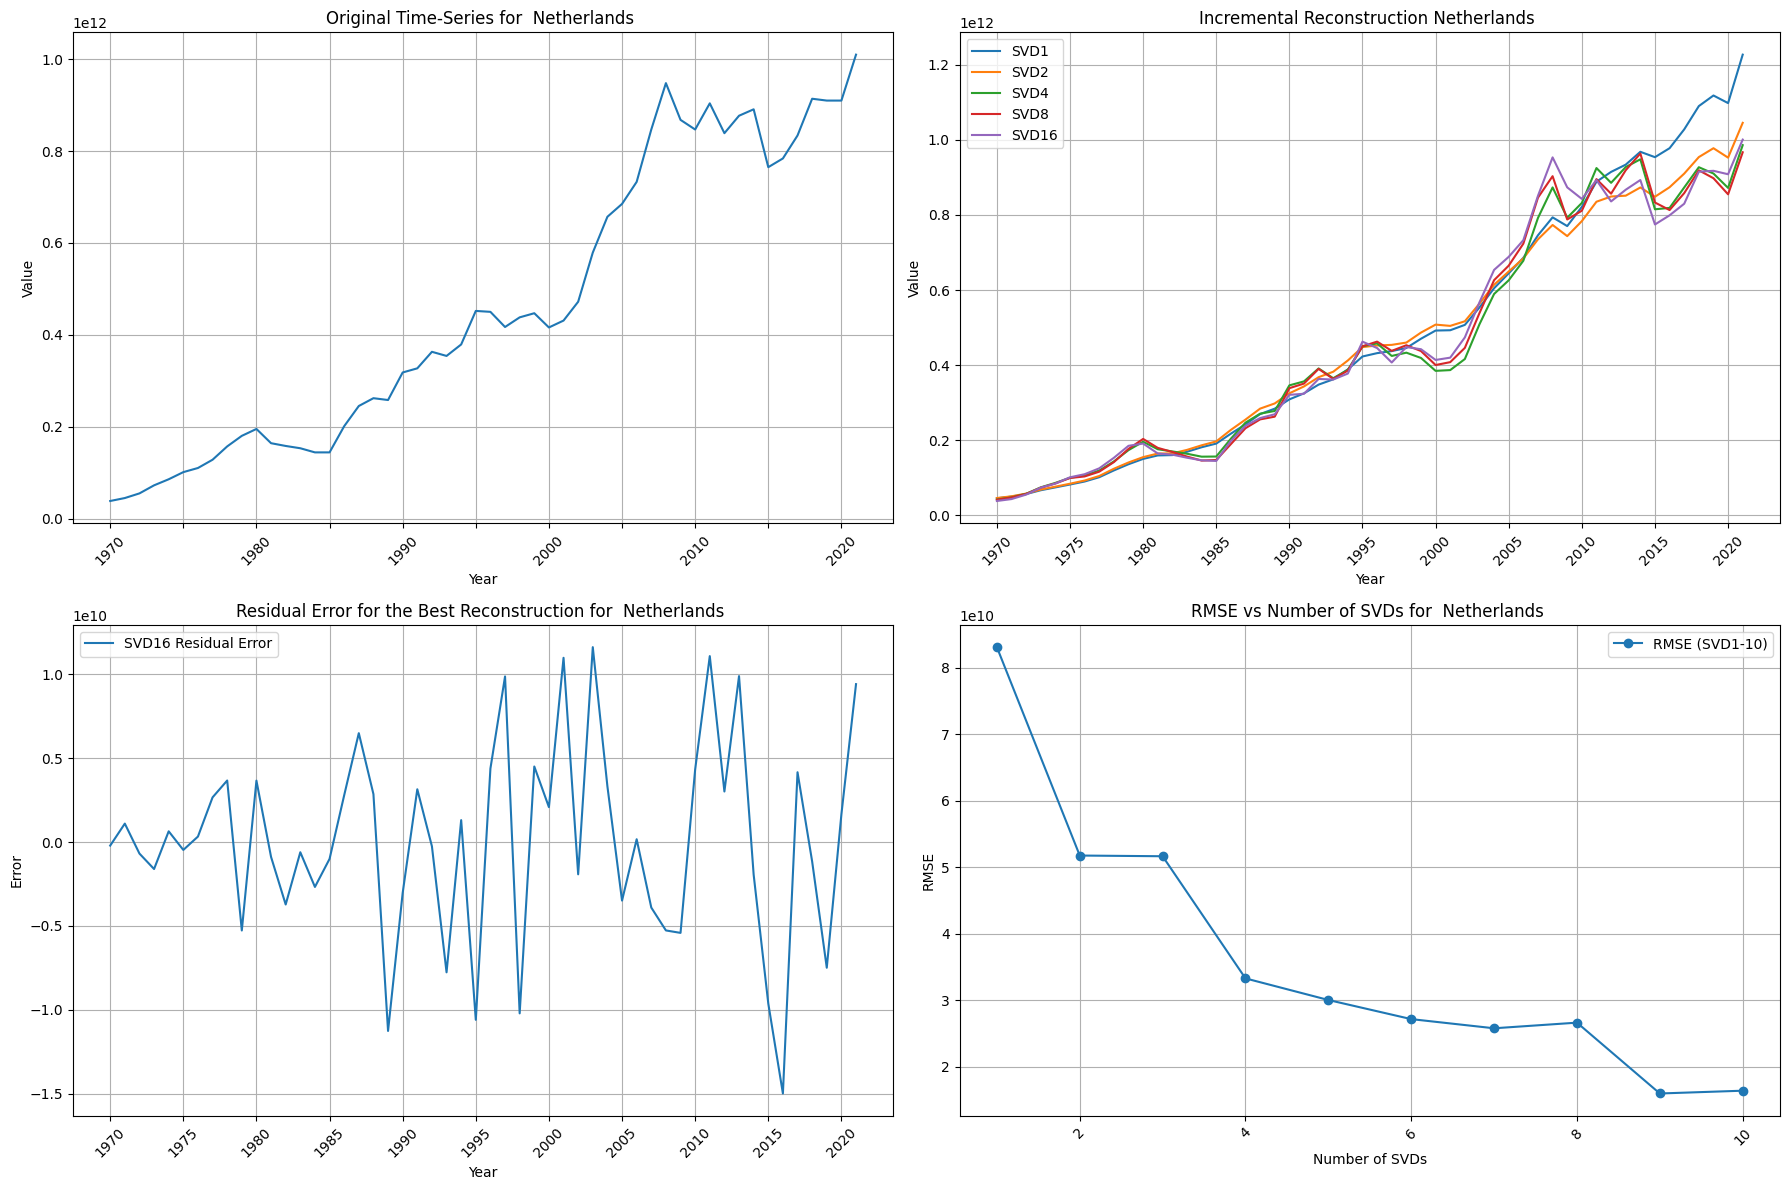

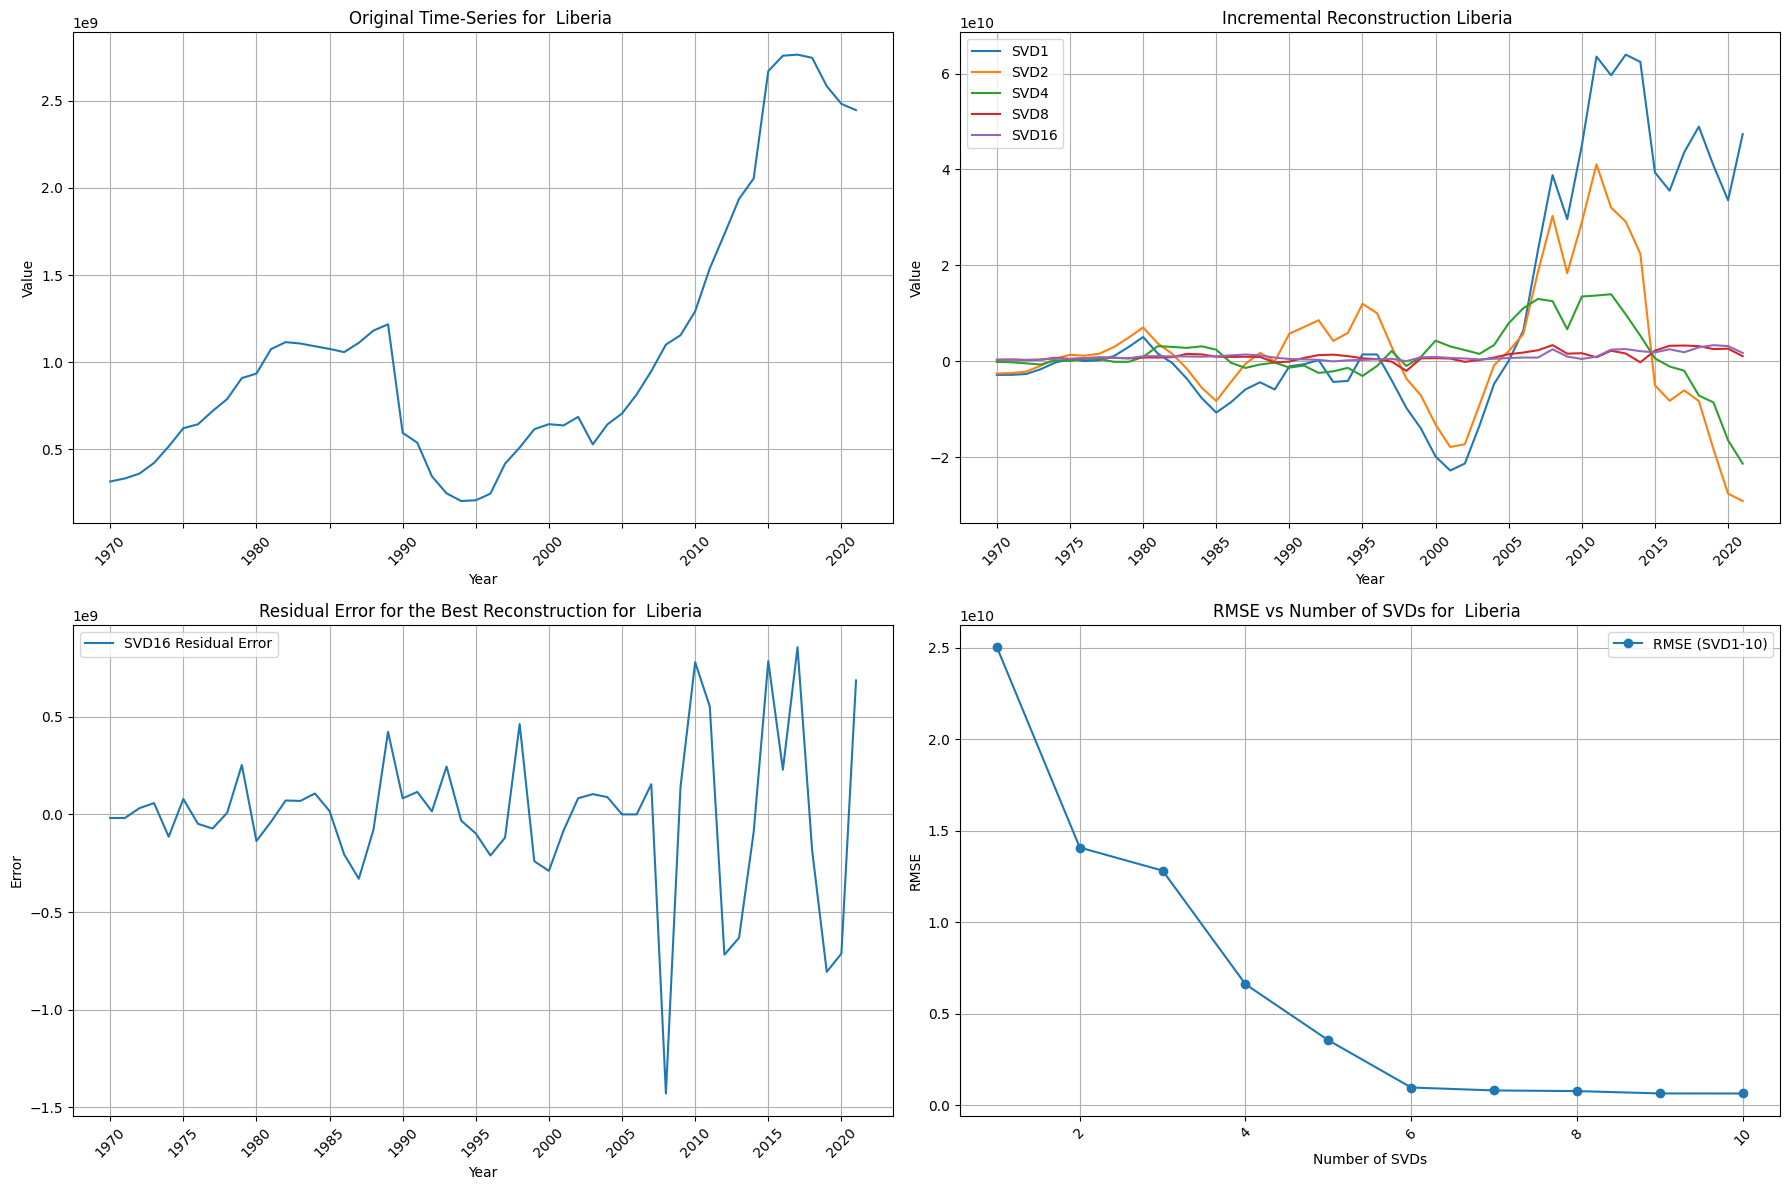

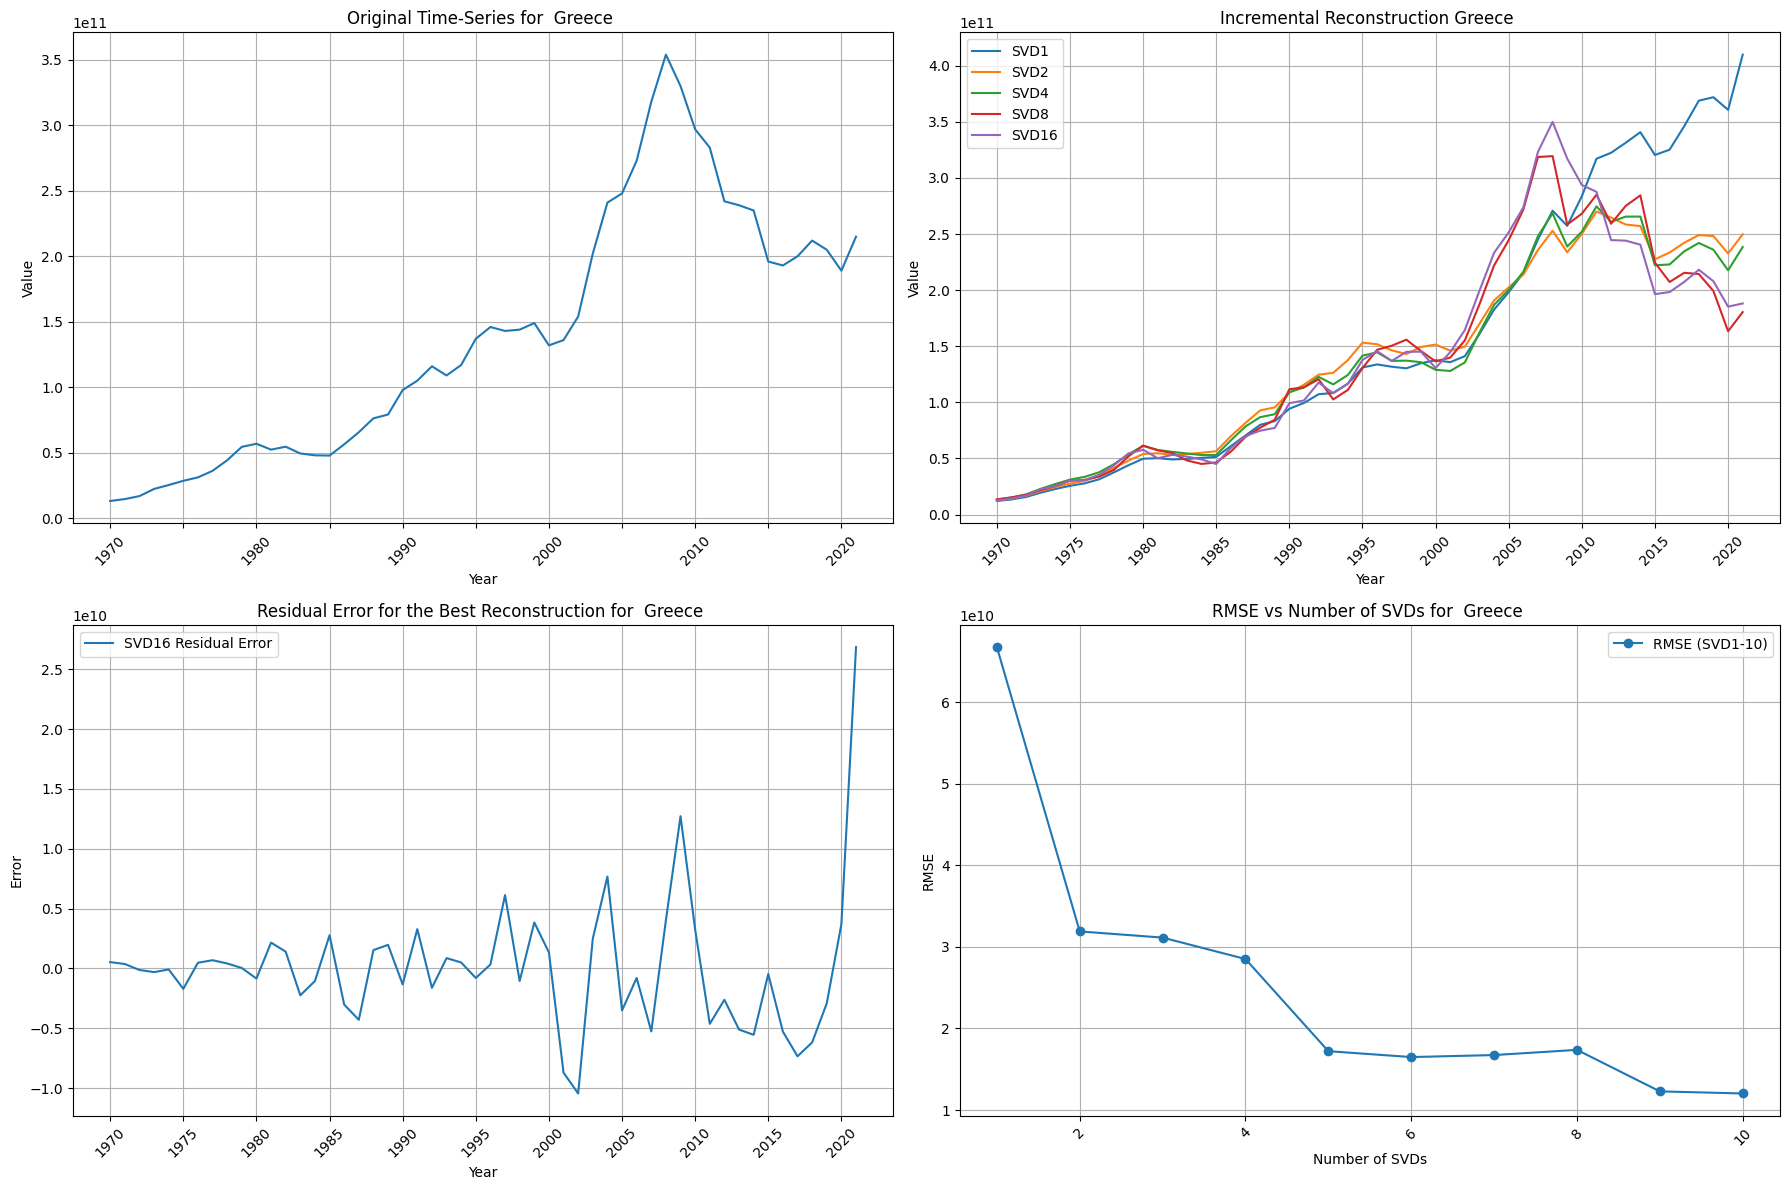

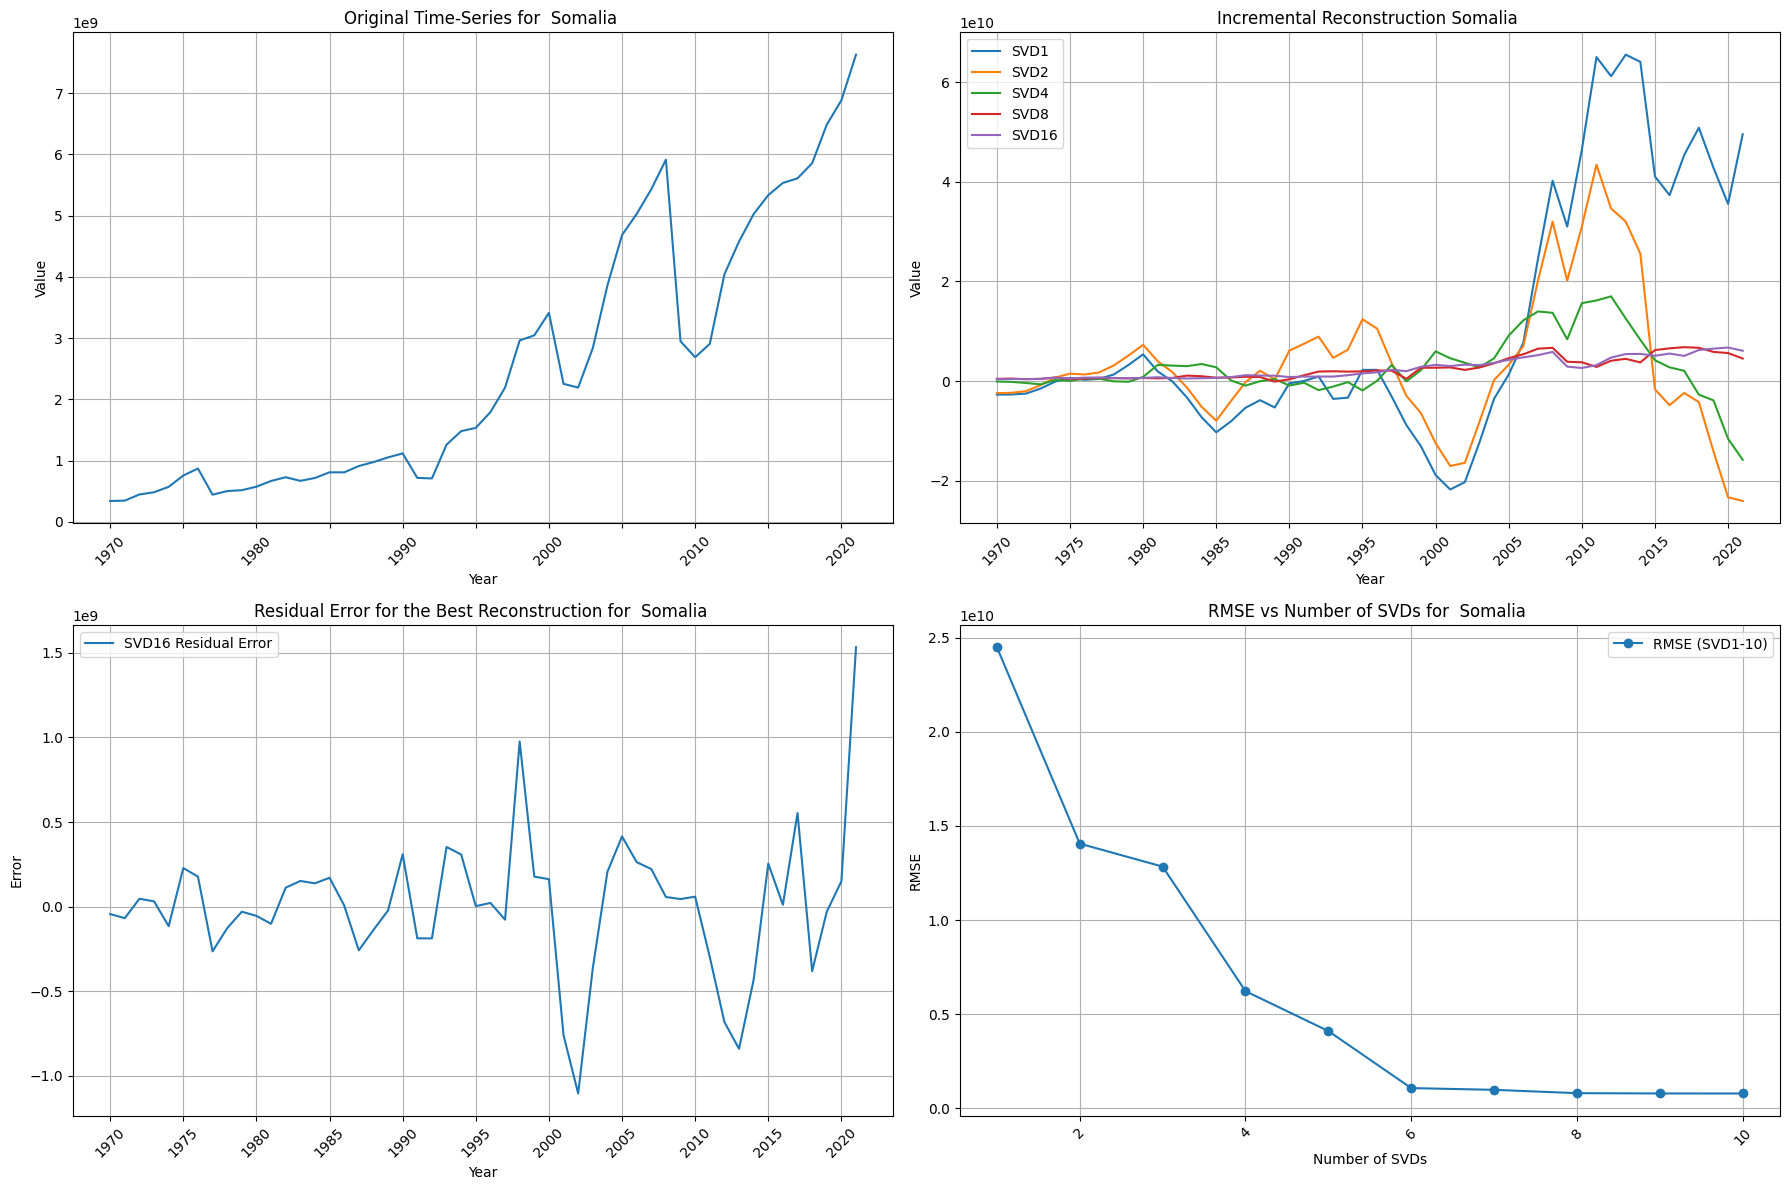

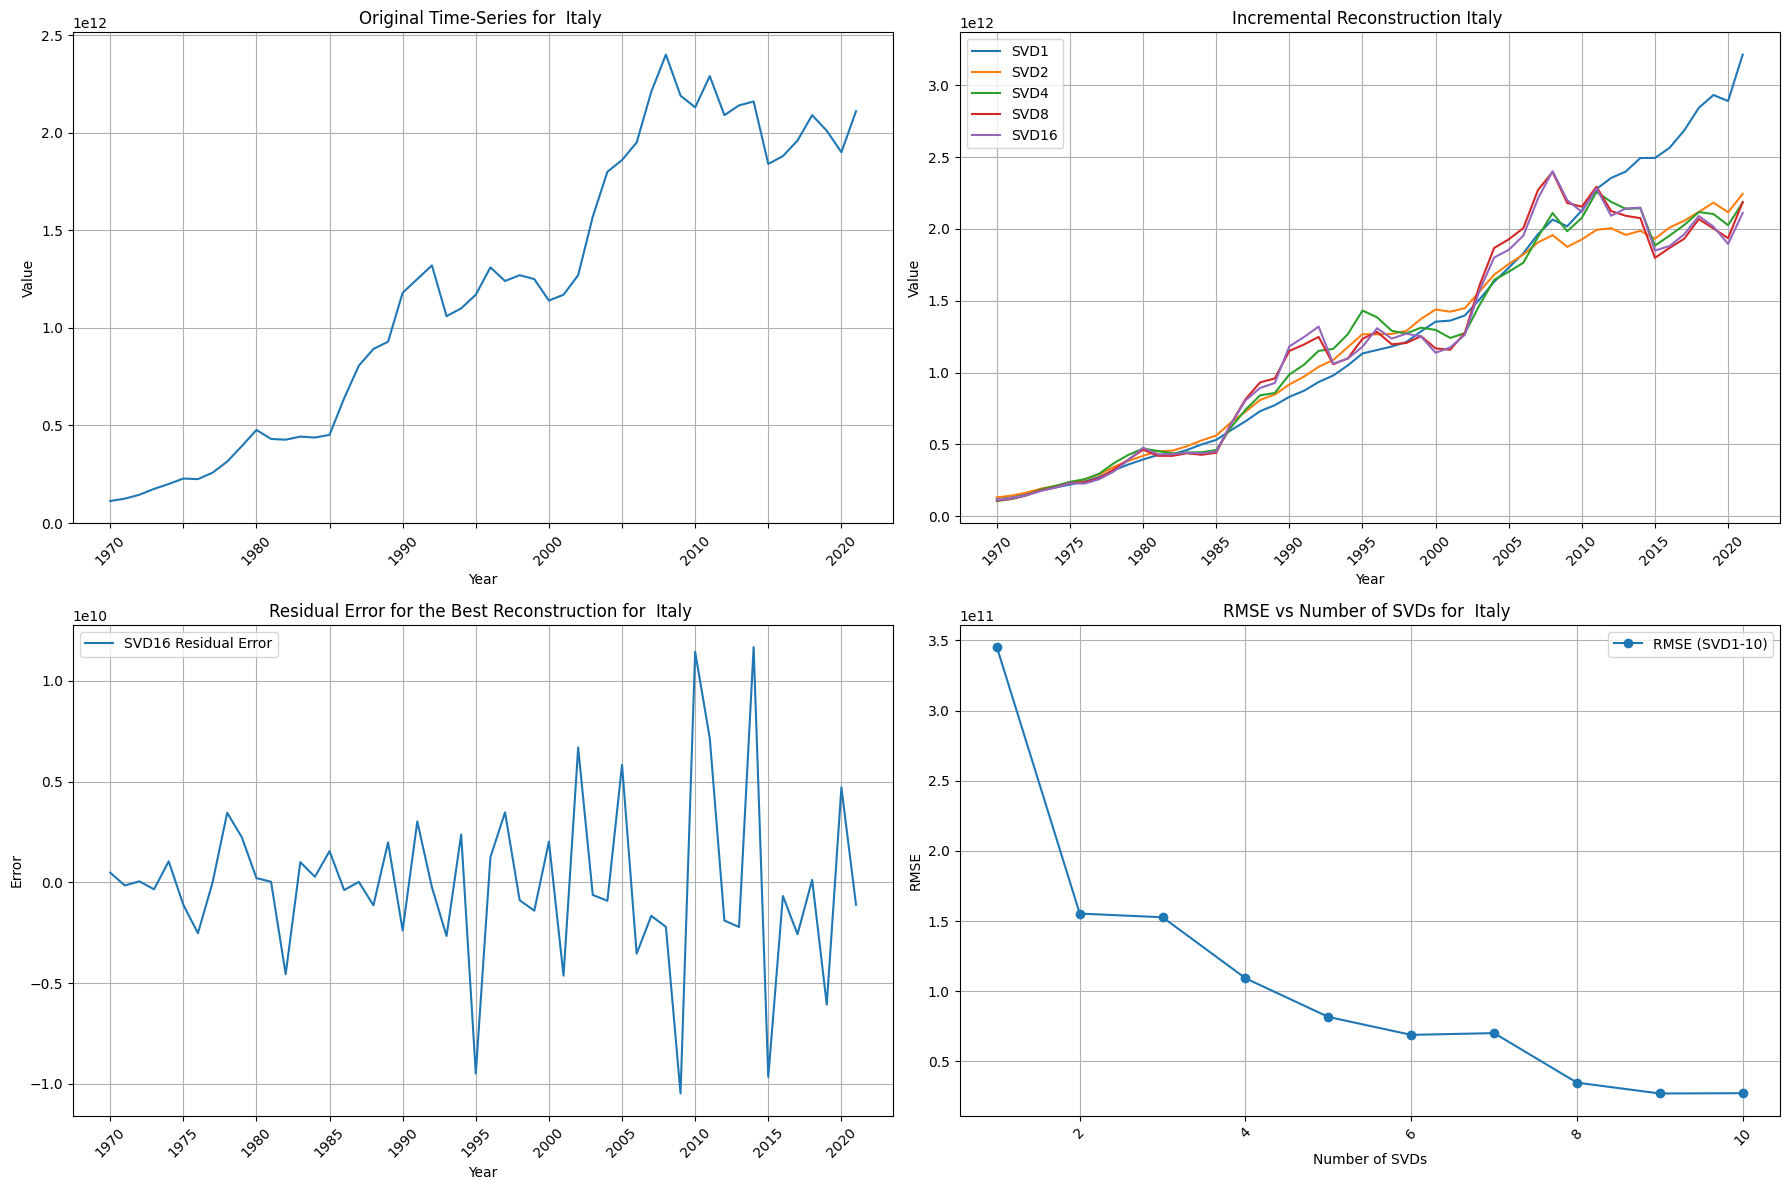

In [21]:
country_list = [' Iceland ', ' Netherlands ', ' Liberia ', ' Greece ', ' Somalia ', ' Italy ']
for country in country_list:
    plot_country_figures_svd(data_raw, country)


In [22]:
def pca_vs_svd(original_df, country_name):
    # Standardize the data
    scaler = StandardScaler()
    original_scaled = scaler.fit_transform(original_df.values)
    
    # Step 1: PCA Analysis
    C = np.cov(original_scaled.T)
    eigenValues, eigenVectors = get_sorted_eigen(C)
    country_data = original_df.loc[country_name].values.reshape(1, -1)
    country_data_standard = scaler.transform(country_data)
    
    rmse_pca_list = []
    components_range = range(1, min(11, original_df.shape[1] + 1))
    for num_components in components_range:
        W = eigenVectors[:, :num_components]
        country_projected = np.dot(country_data_standard, W)
        reconstructed_data_standard = np.dot(country_projected, W.T)
        reconstructed_data_original = scaler.inverse_transform(reconstructed_data_standard)
        rmse_pca = np.sqrt(mean_squared_error(country_data, reconstructed_data_original))
        rmse_pca_list.append(rmse_pca)
    
    # Step 2: SVD Analysis
    U, S, V = np.linalg.svd(original_scaled, full_matrices=False)
    rmse_svd_list = []
    for num_components in components_range:
        v = V[:num_components, :]
        country_projected = np.dot(country_data_standard, v.T)
        reconstructed_data_standard = np.dot(country_projected, v)
        reconstructed_data_original = scaler.inverse_transform(reconstructed_data_standard)
        rmse_svd = np.sqrt(mean_squared_error(country_data, reconstructed_data_original))
        rmse_svd_list.append(rmse_svd)
    
    # Step 3: Plot Comparison of RMSE vs Number of Components
    plt.figure(figsize=(10, 6))
    plt.plot(components_range, rmse_pca_list, marker='o', label='PCA RMSE')
    plt.plot(components_range, rmse_svd_list, marker='x', label='SVD RMSE')
    plt.xlabel('Number of Components')
    plt.ylabel('RMSE')
    plt.title(f'RMSE Comparison for PCA vs SVD - {country_name}')
    plt.legend()
    plt.grid()
    plt.show()

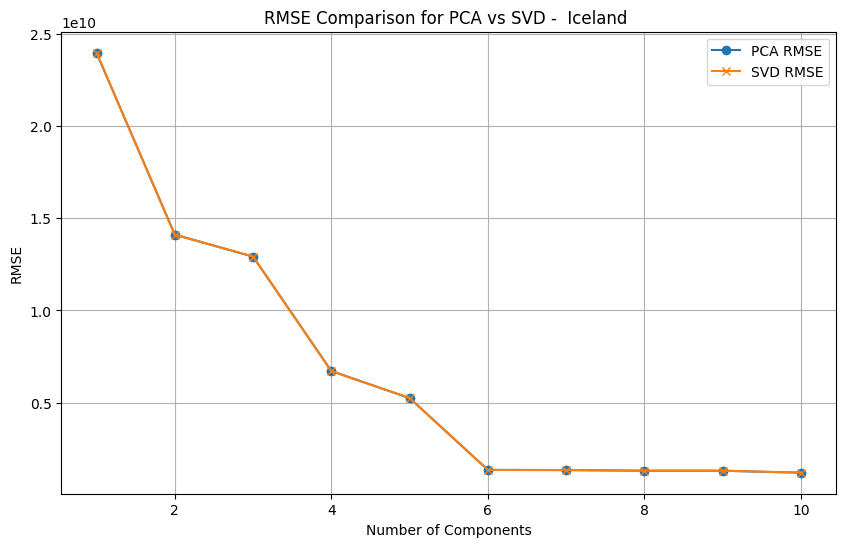

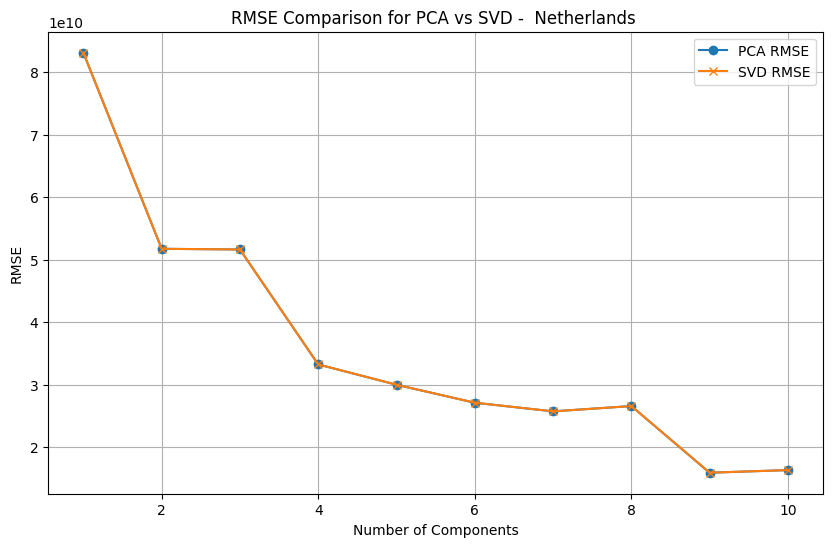

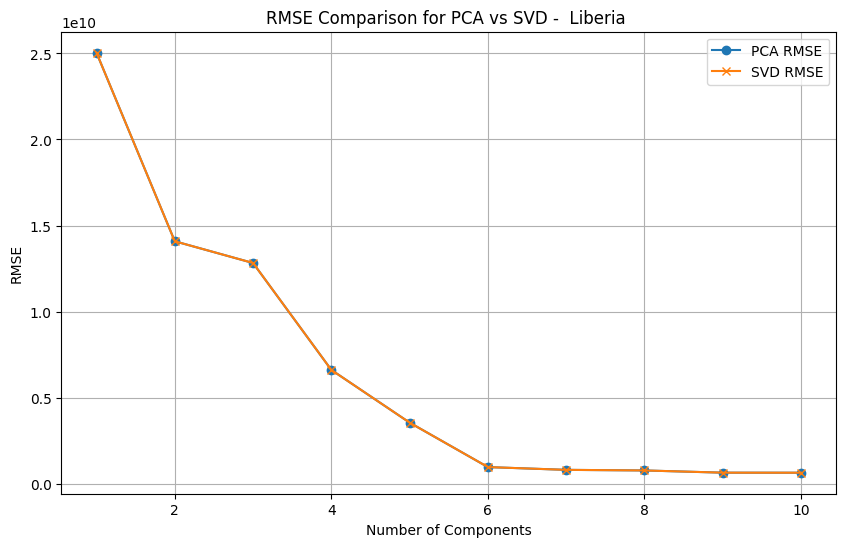

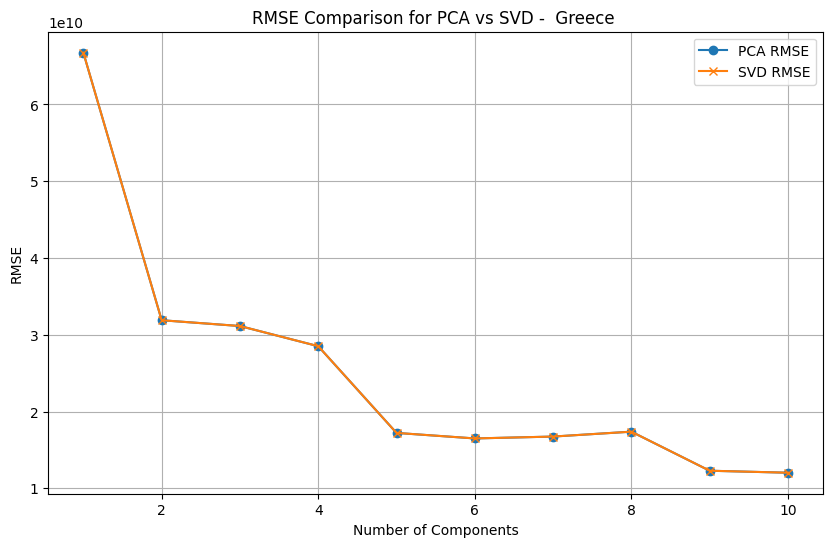

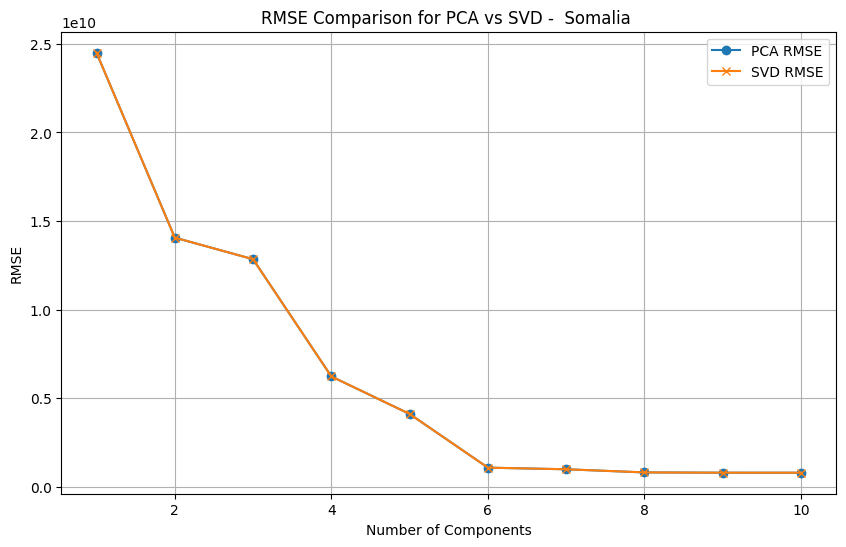

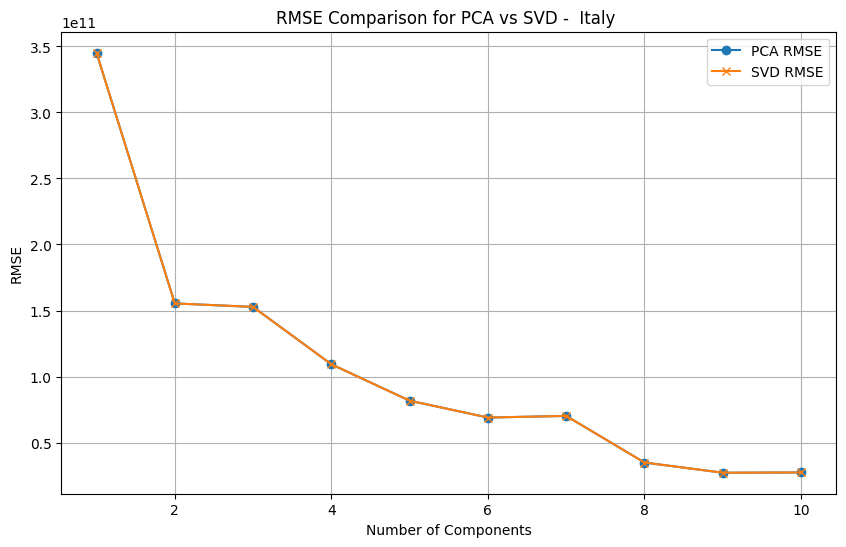

In [23]:
country_list = [' Iceland ', ' Netherlands ', ' Liberia ', ' Greece ', ' Somalia ', ' Italy ']
for country in country_list:
    pca_vs_svd(data_raw, country)

# Part 5: Let's collect another dataset! [2.5 Marks]
Create another dataset similar to the dataset in part 1, this time using the raw information on average monthly electricity sales across various states of the United States from 2001 to 2024 [here](https://raw.githubusercontent.com/Sabaae/Dataset/main/electricity_prices.csv). **[1]**

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). Missing values were removed such that if there was a missing value for the average electricity sales of a particular state at a given date, that date has been completely removed from the dataset, even if the data of that specific date existed for other states.

You are free to use any tools you like, from Excel to Python! In the end, you should have a new CSV file similar to the previous dataset. How many features does the final dataset have? How many cities are there? <p>
62 cities, and 277 features


Upload your new dataset (in CSV format) to your colab notebook, repeat part 4 for this dataset **[1]**, and comment on the results **[0.5]**. When analyzing the states, use `New York`, `Utah`, and three other states with the closest alphabetical names to your first name.<p>
Looking at the time series analysis and dimensionality reduction comparison across five states (New York, Utah, Indiana, New Jersey, and Louisiana), several key patterns emerge. In the initial analysis, each state demonstrates significant improvement in reconstruction accuracy as SVD components increase from 1 to 16, with the most improvements occurring in the first 4 components. The states show vary patterns - Utah displays a distinctive upward trend while others exhibit more cyclical patterns. The residual error plots with SVD16 reveal mostly random errors centered around zero, indicating effective signal capture. When comparing PCA and SVD methods, the results show identical RMSE values between both techniques. Both methods demonstrate substantial error reduction as components increase from 1 to 10, with the most significant improvements occurring within the first 2-4 components. This suggests that both PCA and SVD are equally effective for dimensionality reduction in this context, with early components capturing the most important patterns in the data.


The code below helps you to upload your new CSV file to your colab session.

In [24]:
# get url
url = 'https://raw.githubusercontent.com/Sabaae/Dataset/main/electricity_prices.csv'
df = pd.read_csv(url)

In [25]:
df.drop(['Unnamed: 0', 'month', 'price', 'revenue'], axis=1)
df = df[df['sectorName'] == 'all sectors']
df.drop(['sectorName'], axis=1, inplace=True)

In [26]:
# Step 2: Pivot the DataFrame to create a time series like structure
df_pivot = df.pivot(index='stateDescription', columns='date', values='sales')

# Remove the states with missing values
df_pivot.dropna(inplace=True)

# Display the reshaped DataFrame
print(df_pivot.head())

# To csv
df_pivot.to_csv('electricity_sales.csv')

date               2001-01-01   2001-02-01   2001-03-01   2001-04-01  \
stateDescription                                                       
Alabama            7362.47302   6041.02574   5894.61038   6064.53539   
Alaska              521.03566    486.09655    443.79575    442.19678   
Arizona            4786.79176   4416.00228   4362.10349   4184.61427   
Arkansas           3804.21013   3256.86530   3031.50981   2973.53436   
California        21744.31668  18305.55916  21351.40877  18855.59986   

date               2001-05-01   2001-06-01   2001-07-01   2001-08-01  \
stateDescription                                                       
Alabama            6413.96530   7169.37956   7794.07207   7906.56345   
Alaska              415.90066    414.23448    421.09334    422.70564   
Arizona            5131.87593   5816.22924   6475.18991   6529.11864   
Arkansas           3076.88704   3550.33976   4176.61212   4428.11278   
California        19862.25747  21194.24204  21538.59260  23772.

In [27]:
df_pivot.shape

(62, 277)

In [28]:
# load train.csv to Google Colab
#rom google.colab import files
#uploaded = df.upload()

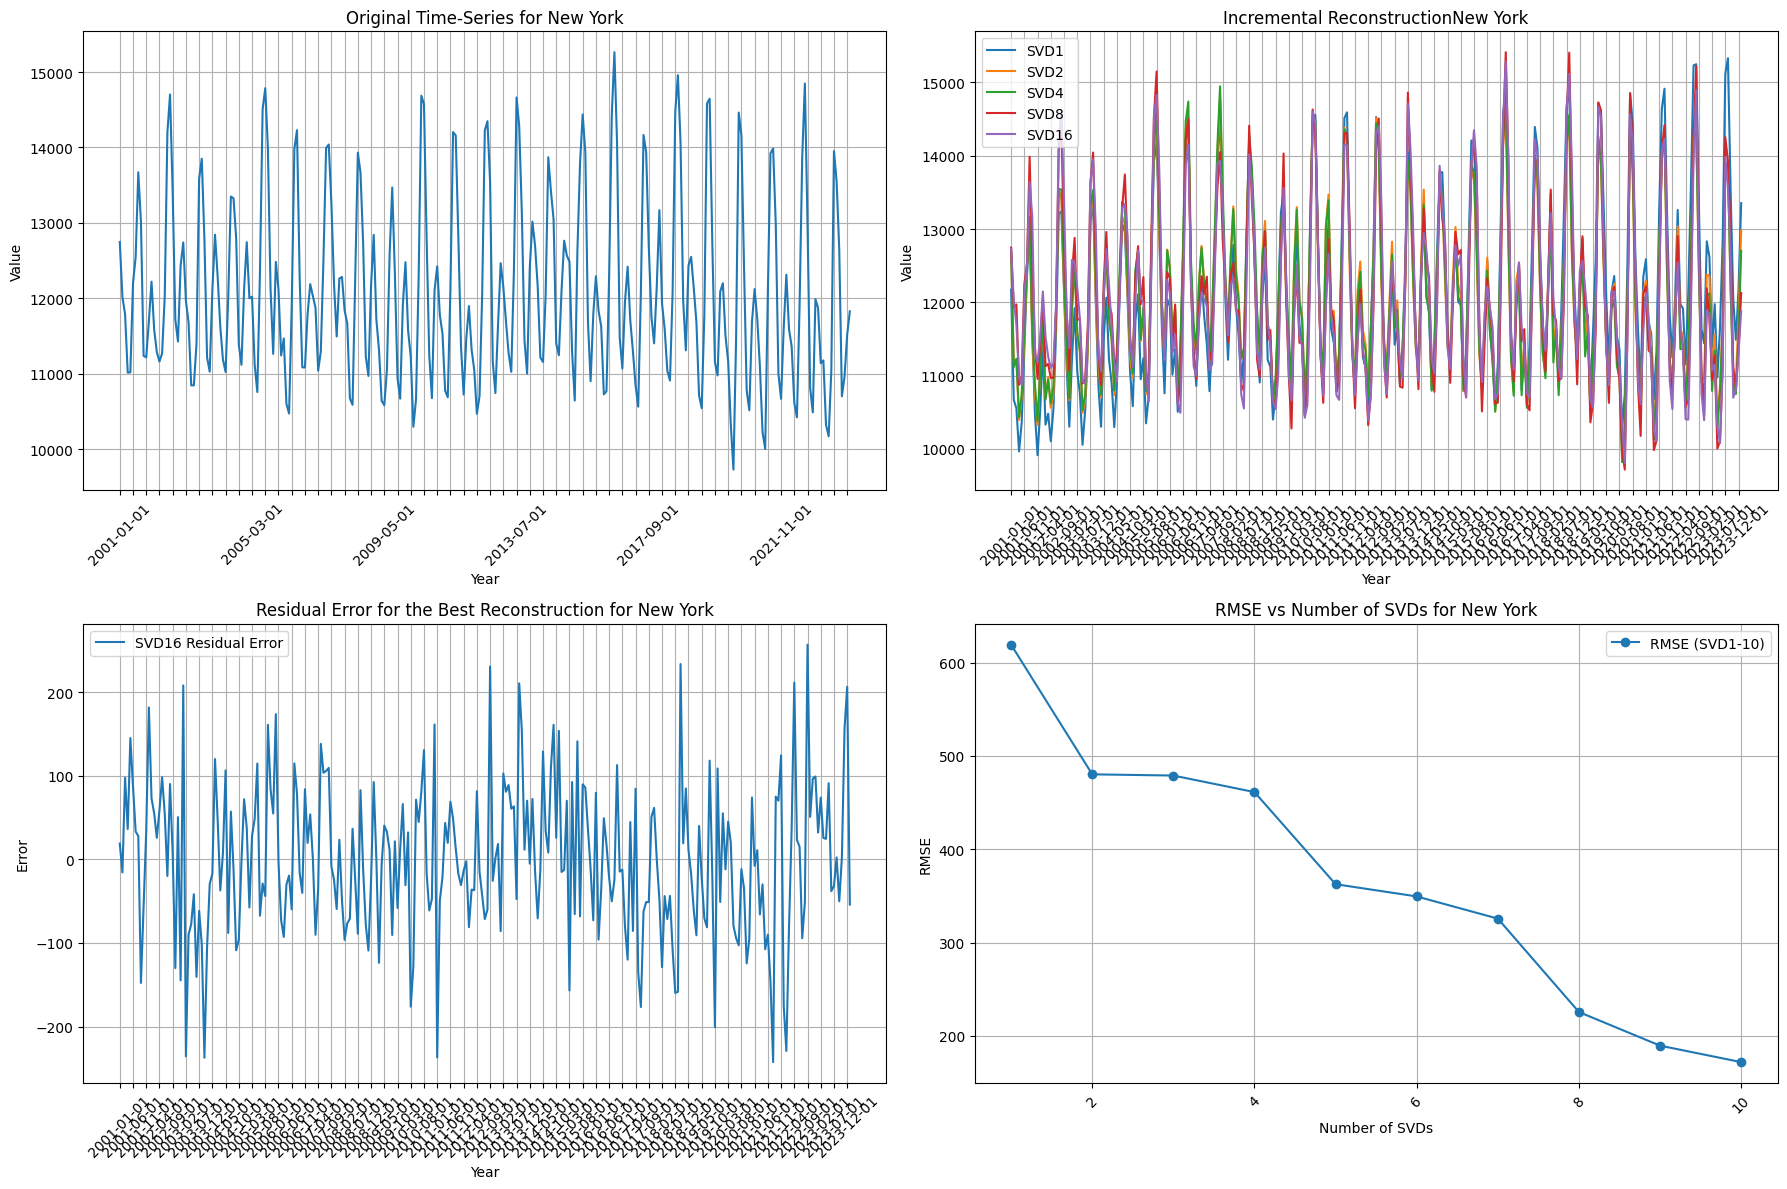

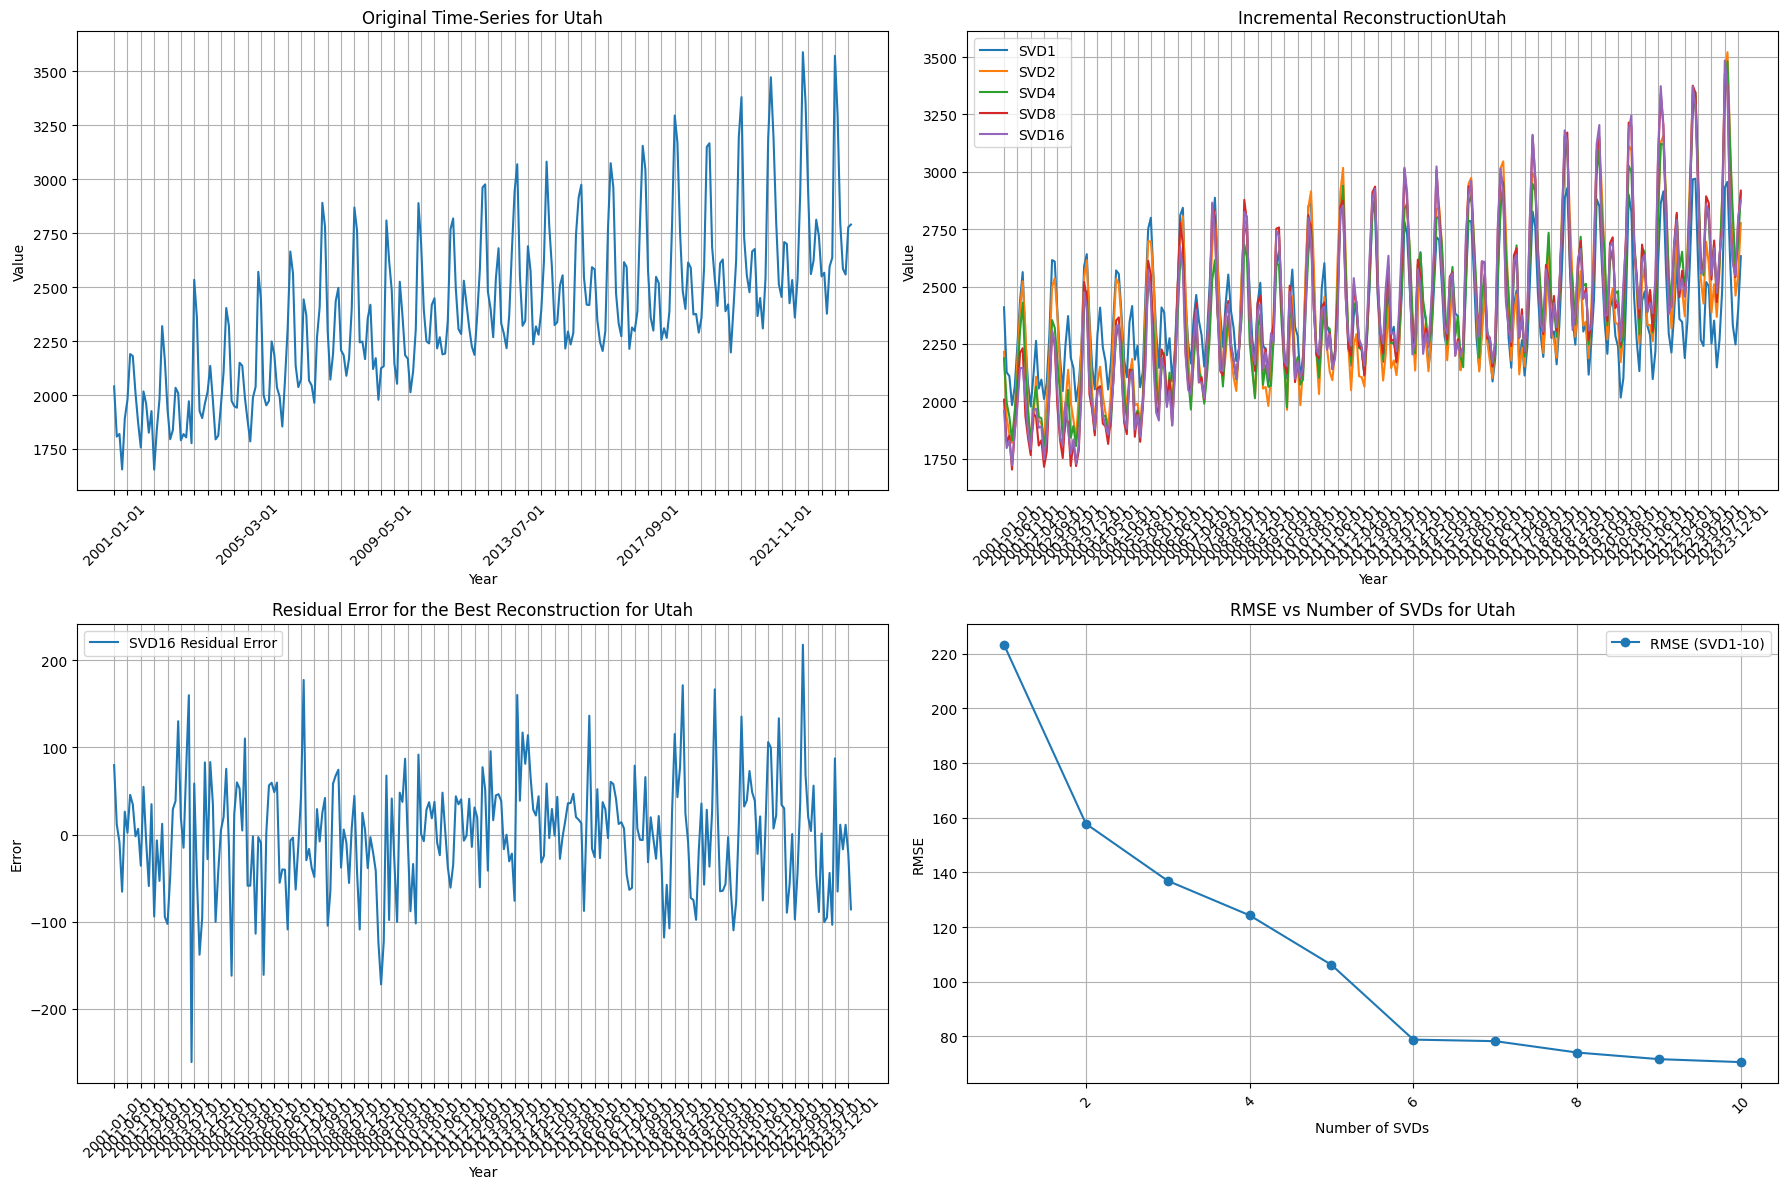

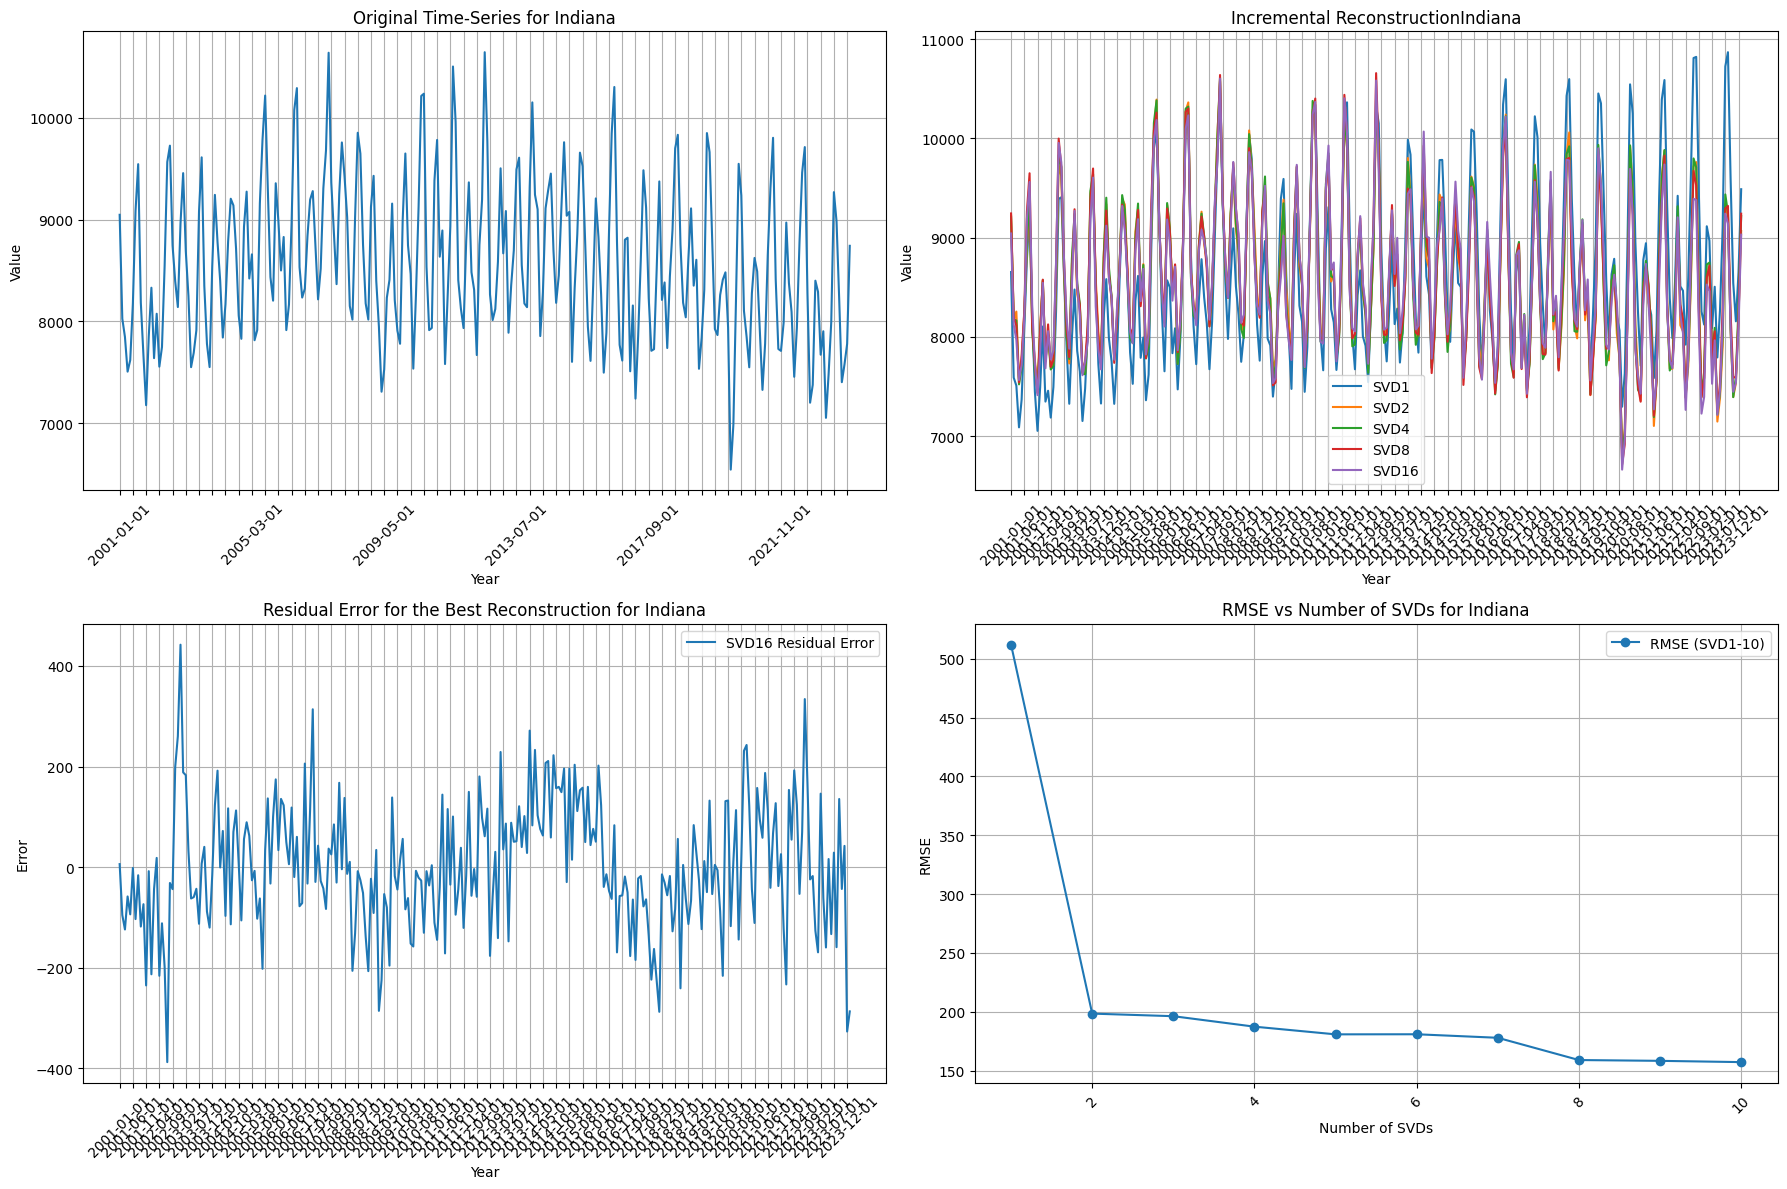

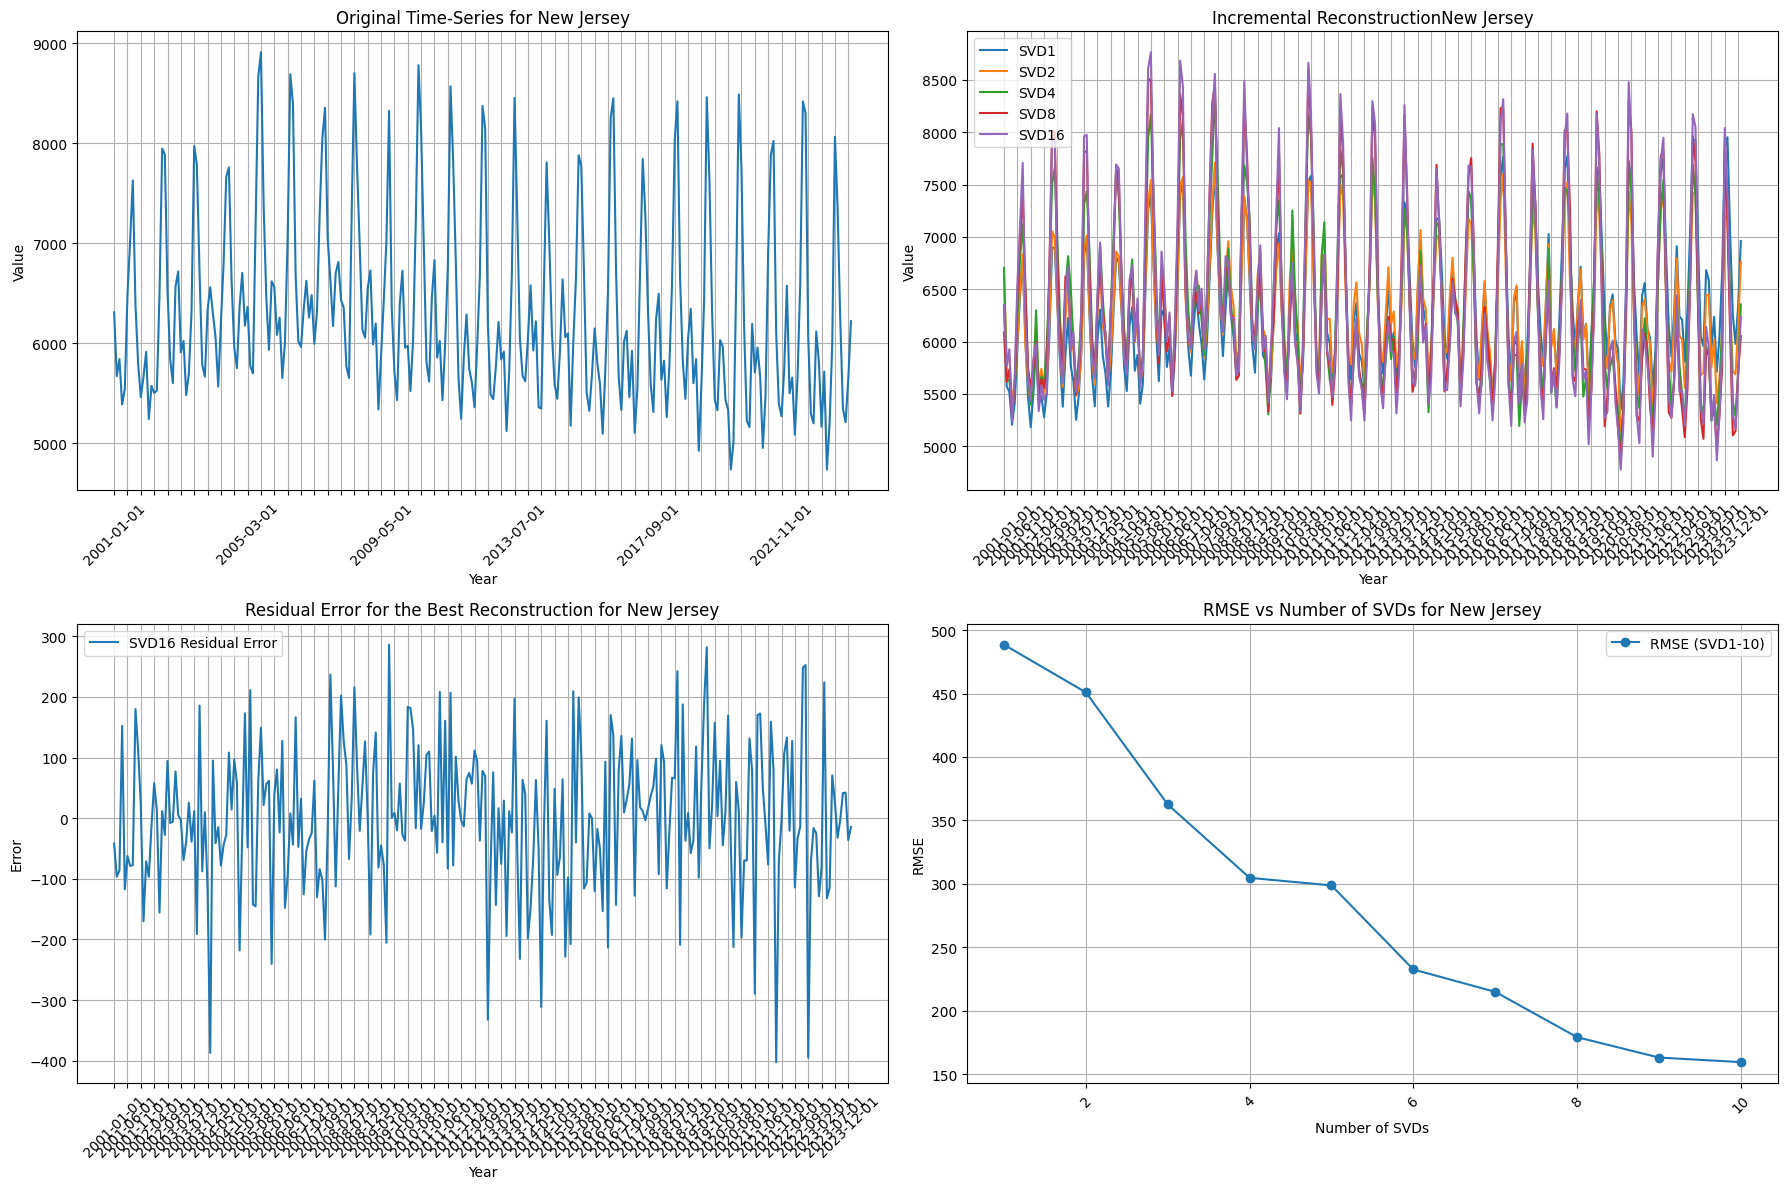

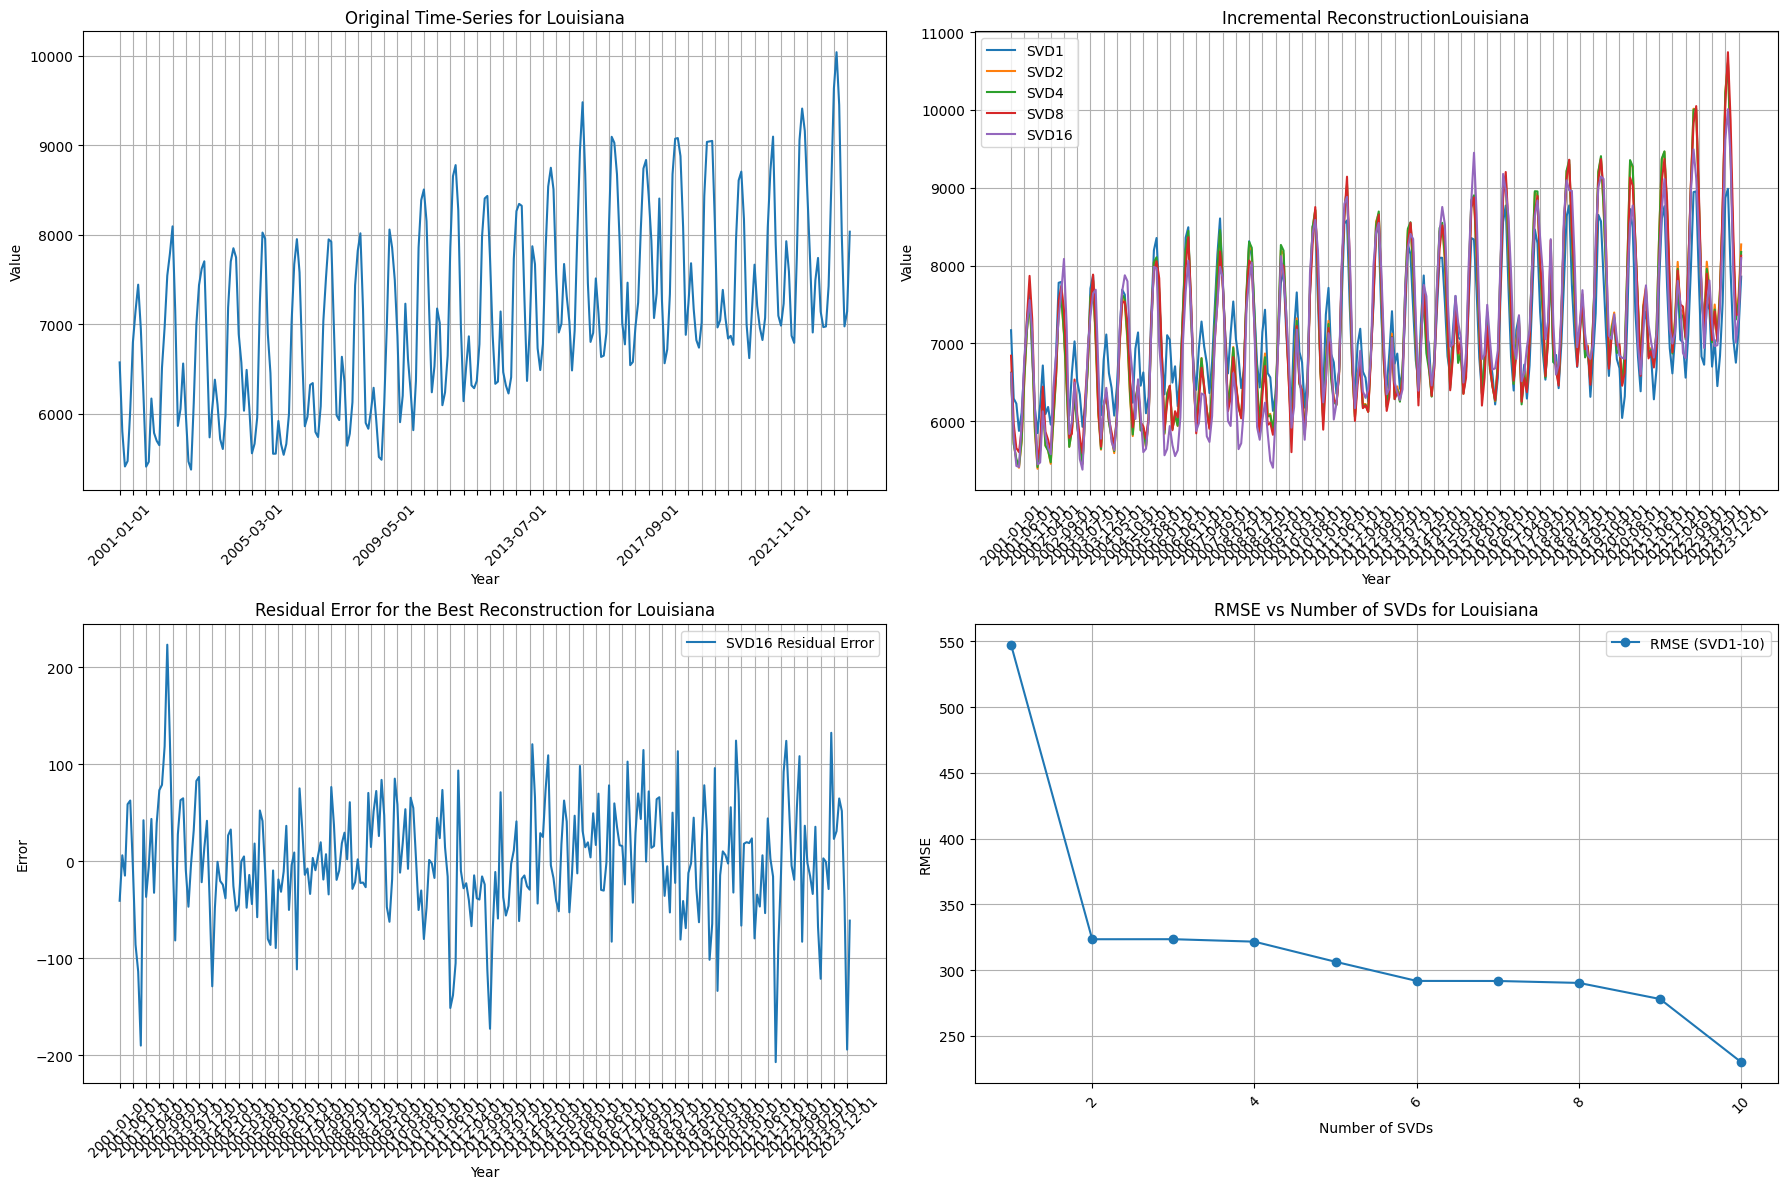

In [29]:
### YOUR CODE HERE ###
state_list = ['New York', 'Utah', 'Indiana','New Jersey','Louisiana']
for state in state_list:
    plot_country_figures_svd(df_pivot, state)

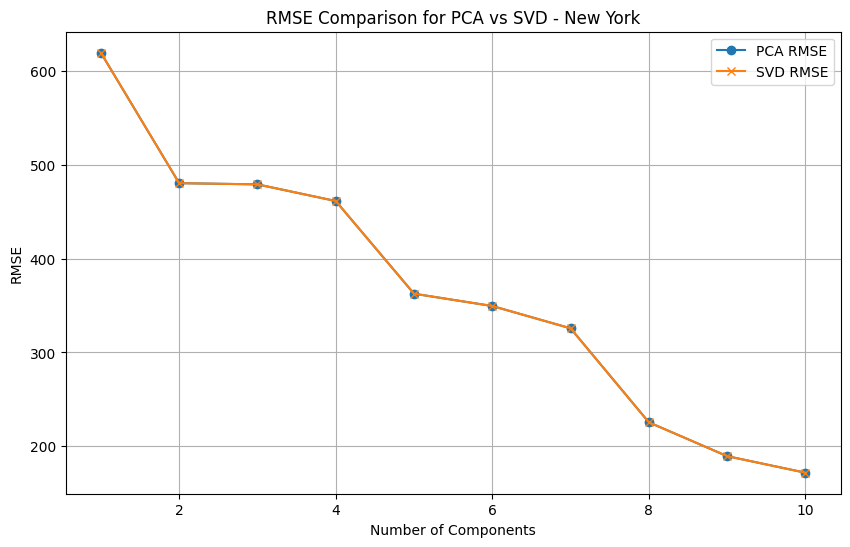

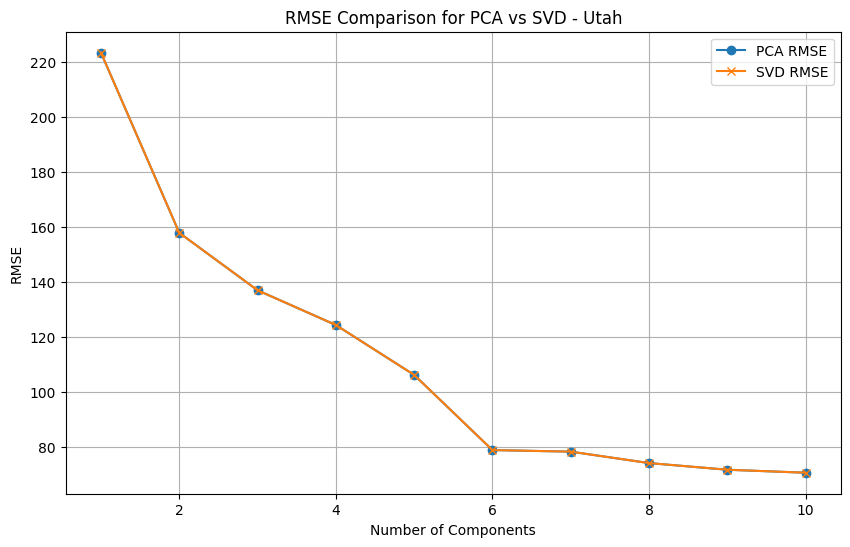

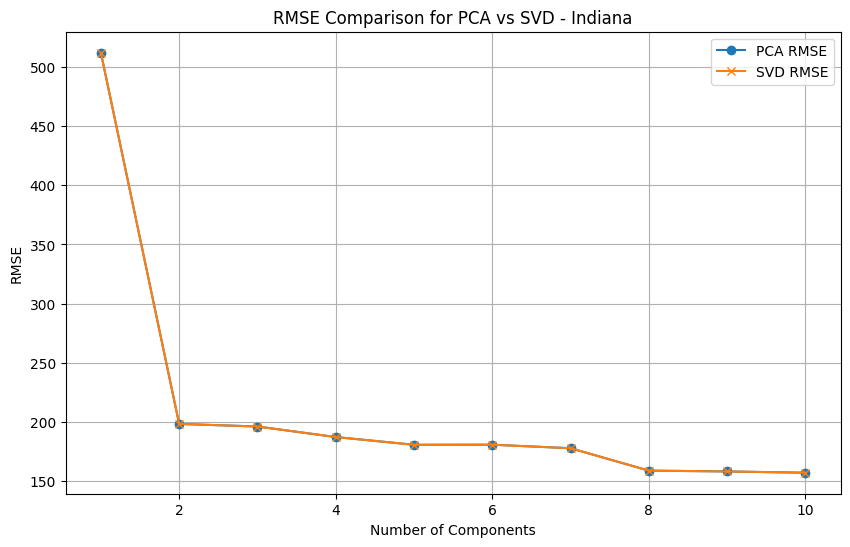

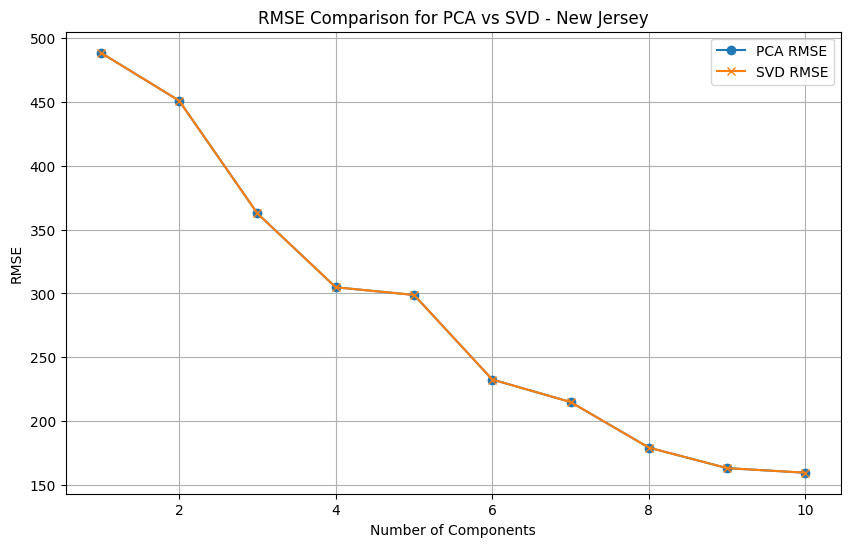

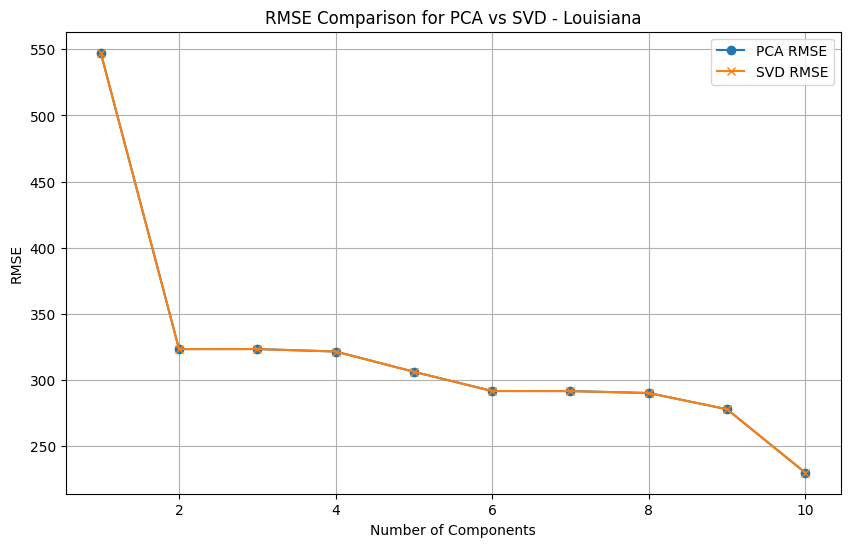

In [30]:
state_list = ['New York', 'Utah', 'Indiana','New Jersey','Louisiana']
for state in state_list:
    pca_vs_svd(df_pivot, state)

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

U.S. Electricity Prices Data:

1. https://www.kaggle.com/datasets/alistairking/electricity-prices
